<a href="https://colab.research.google.com/github/chogevincent/Farm_Products_Analysis_and_Prediction/blob/main/Farm_Products_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FARM PRODUCTS ANALYSIS AND PREDICTION**

# **Dataset Overview**


This dataset provides insights into various aspects of agriculture, specifically focusing on farm-level details, crop types, irrigation methods, soil properties, and associated metrics such as yield, water usage, fertilizer usage, and pesticide usage. The goal is to analyze and predict crop yields and identify factors that influence productivity.

 # **Problem**

**Agricultural yield** is a critical factor that impacts food production, farmer profitability, and resource sustainability. This project leverages machine learning models to analyze key farm parameters such as crop type, irrigation methods, soil composition, and seasonal variations—to predict crop yields accurately. By understanding how factors like fertilizer usage, pesticide application, and water consumption influence productivity, farmers can make data-driven decisions to optimize resource allocation and improve harvest outcomes. The predictive insights generated by this model help in mitigating risks associated with climate change, soil degradation, and inefficient farming practices, ultimately enhancing agricultural efficiency and sustainability.

#### **Key Features:**
**Farm_ID**: Unique identifier for each farm.

**Crop_Type**: Type of crop cultivated (e.g., Cotton, Carrot, Wheat).

 **Irrigation_Type**: Method of irrigation used (e.g., Drip, Manual, Flood).

**Soil_Type**: Type of soil present on the farm (e.g., Loamy, Sandy, Silty).

**Season:** The season in which the crop is grown (e.g., Kharif, Rabi, Zaid).

**Farm_Area (acres)**: Total area of the farm in acres.

 **Fertilizer_Used (tons)**: Quantity of fertilizer applied.

 **Pesticide_Used (kg)**: Amount of pesticide used.

 **Water_Usage (cubic meters)**: Total water usage for the crop.

**Yield (tons)**: Total yield of the crop in tons.

#### **Objectives**

1. To analyze the relationships between these variables.

2. To identify factors that influence crop yields.

3. To build predictive models to estimate yields based on input features.

#### **Data Characteristics:**

**Data Type**: The dataset contains both numerical and categorical features.

**Target Variable**: Yield(tons)

 **Encoded Features**: Categorical variables such as Crop_Type, Irrigation_Type, and Soil_Type are encoded for modeling purposes.

# **Step 1. Importing Libraries and Setup**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings("ignore")

# **Step 2. Load and Explore Dataset**

In [5]:
# Load the dataset
df = pd.read_csv('/content/FarmProducts.csv')

In [6]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)

display(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (50, 11)


,Datetime,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,1/21/2024,F045,Tomato,326.69,Sprinkler,5.24,0.55,18.34,Peaty,Kharif,37466.11
1,1/21/2024,F007,Soybean,360.06,Drip,1.83,2.37,44.93,Sandy,Rabi,40583.57
2,1/22/2024,F026,Wheat,162.28,Flood,5.85,2.42,24.63,Loamy,Rabi,65838.40
3,2/18/2024,F030,Potato,286.52,Rain-fed,8.91,0.77,30.50,Loamy,Zaid,93407.38
4,2/20/2024,F037,Soybean,156.10,Manual,1.18,4.43,40.15,Loamy,Zaid,73646.55



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Datetime                   50 non-null     object 
 1   Farm_ID                    50 non-null     object 
 2   Crop_Type                  50 non-null     object 
 3   Farm_Area(acres)           50 non-null     float64
 4   Irrigation_Type            50 non-null     object 
 5   Fertilizer_Used(tons)      50 non-null     float64
 6   Pesticide_Used(kg)         50 non-null     float64
 7   Yield(tons)                50 non-null     float64
 8   Soil_Type                  50 non-null     object 
 9   Season                     50 non-null     object 
 10  Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(6)
memory usage: 4.4+ KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Farm_Area(acres),50.0,254.9638,139.417782,12.50,135.7100,281.980,368.1075,483.88
Fertilizer_Used(tons),50.0,4.9054,2.732689,0.50,2.4375,5.045,6.8850,9.96
Pesticide_Used(kg),50.0,2.3980,1.438613,0.14,0.9725,2.330,3.4175,4.99
Yield(tons),50.0,27.0592,13.345789,3.86,16.1900,28.970,37.8600,48.02
Water_Usage(cubic meters),50.0,56724.2956,27264.992053,5869.75,37818.1525,54097.075,82240.0325,94754.73


#### **Explanation of the dataset:**

**Shape of the dataset:** (50, 10)

**Column Information:**

**Farm_ID:** Unique identifier for each farm (object)

**Crop_Type:** Type of crop being cultivated (object)

**Farm_Area(acres):** Land area of the farm in acres (float64)

**Irrigation_Type:** Type of irrigation used (object)

**Fertilizer_Used(tons):** Amount of fertilizer used in tons (float64)

**Pesticide_Used(kg):** Amount of pesticide used in kg (float64)

**Yield(tons):** Crop yield in tons (float64)

**Soil_Type:** Type of soil on the farm (object)

**Season:** Season in which the crop is cultivated (object)

**Water_Usage(cubic meters):** Water used in cubic meters (float64)

**Statistical Summary:**

The average farm area is around **255 acres**, with a standard deviation of **139.**

Fertilizer and pesticide usage vary, with average values of**4.9 tons and 2.4 kg**, respectively.

The average crop yield is about **27 tons**, with water usage **averaging 56,724** cubic meters.

#### **Checking for the missing Values**

In [7]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')

print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


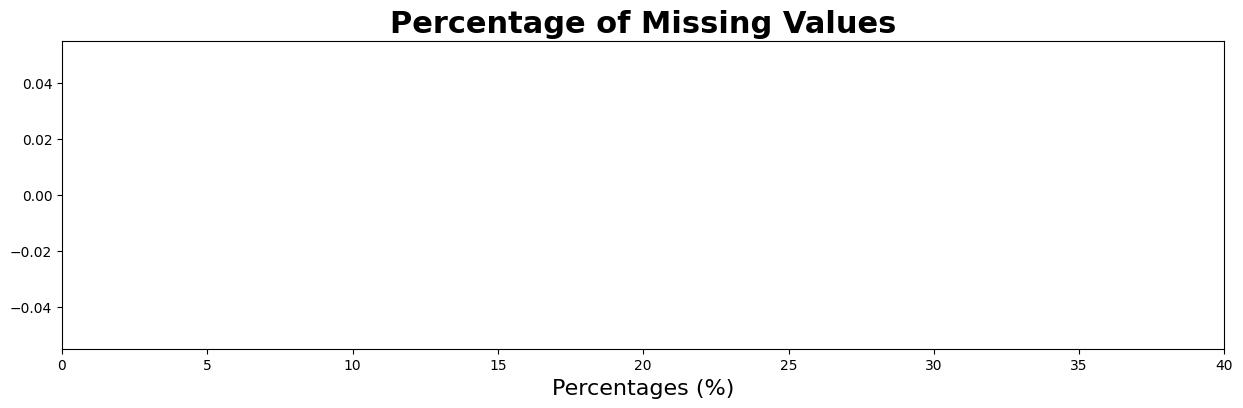

In [8]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [9]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['Farm_ID', 'Crop_Type', 'Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)','Yield(tons)','Soil_Type','Season','Water_Usage(cubic meters)'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,Datetime,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)


#### **Correcting Farm IDs Anomalies**

In [10]:
# Finding the number of unique farm IDs
unique_farm_IDs = df['Farm_ID'].nunique()

# Printing the number of unique farm IDs
print(f"The number of unique farm IDs in the dataset is: {unique_farm_IDs}")

The number of unique farm IDs in the dataset is: 50


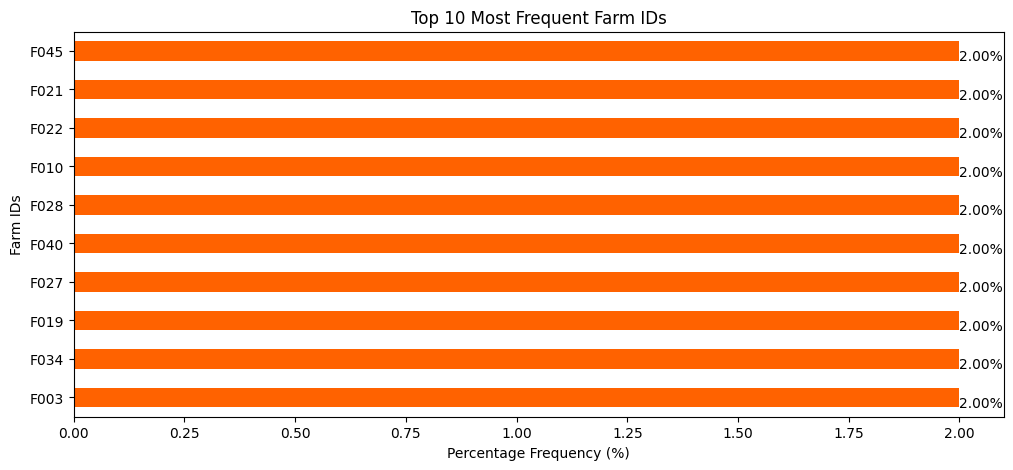

In [11]:
# Finding the top 10 most frequent farm IDs
top_10_farm_IDs = df['Farm_ID'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent farm IDs
plt.figure(figsize=(12, 5))
top_10_farm_IDs.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_farm_IDs):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Farm IDs')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Farm IDs')
plt.gca().invert_yaxis()
plt.show()

In [12]:
# Finding the number of numeric characters in each unique stock IDs
unique_farm_IDs = df['Farm_ID'].unique()
numeric_char_counts_in_unique_IDs = pd.Series(unique_farm_IDs).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique farm IDs
print("Value counts of numeric character frequencies in unique farm IDs:")
print("-"*70)
print(numeric_char_counts_in_unique_IDs)

Value counts of numeric character frequencies in unique farm IDs:
----------------------------------------------------------------------
3    50
Name: count, dtype: int64


In [13]:
# Finding and printing the farm IDs with 0 and 1 numeric characters
anomalous_farm_IDs = [code for code in unique_farm_IDs if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous Farm IDs:")
print("-"*22)
for code in anomalous_farm_IDs:
    print(ID)

Anomalous Farm IDs:
----------------------


In [14]:
# Calculating the percentage of records with these farm IDs
percentage_anomalous = (df['Farm_ID'].isin(anomalous_farm_IDs).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous farm IDs in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous farm IDs in the dataset is: 0.00%


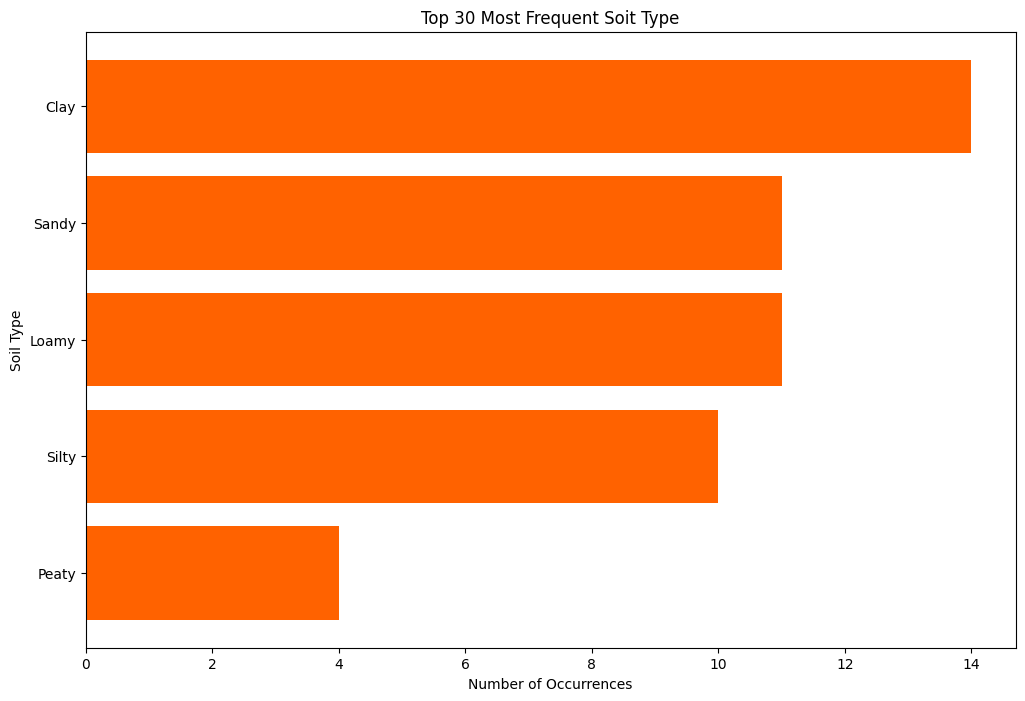

In [15]:
# Cleaning Soil Tpye Column

# Calculate the occurrence of each unique Soil Type and sort them
soil_type_counts = df['Soil_Type'].value_counts()

# Get the top 30 Soil type
top_30_soil_type = soil_type_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_soil_type.index[::-1], top_30_soil_type.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Soil Type')
plt.title('Top 30 Most Frequent Soit Type')

# Show the plot
plt.show()

# **Step 3. Unique Value Exploration**

In [16]:
# Display the number of unique values in each column

print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Datetime                     46
Farm_ID                      50
Crop_Type                    10
Farm_Area(acres)             50
Irrigation_Type               5
Fertilizer_Used(tons)        49
Pesticide_Used(kg)           46
Yield(tons)                  50
Soil_Type                     5
Season                        3
Water_Usage(cubic meters)    50
dtype: int64


In [17]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)


Numerical Columns: ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

Categorical Columns: ['Datetime', 'Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']


In [18]:
# Display unique values for each categorical column

for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Datetime
Unique Values: ['1/21/2024' '1/22/2024' '2/18/2024' '2/20/2024' '2/24/2024' '2/28/2024'
 '3/12/2024' '3/28/2024' '3/29/2024' '4/9/2024' '4/12/2024' '4/16/2024'
 '5/1/2024' '5/10/2024' '5/14/2024' '5/29/2024' '5/31/2024' '6/9/2024'
 '6/15/2024' '6/18/2024' '6/23/2024' '7/6/2024' '7/7/2024' '7/8/2024'
 '7/10/2024' '8/2/2024' '8/23/2024' '8/31/2024' '9/9/2024' '9/14/2024'
 '9/27/2024' '9/30/2024' '10/3/2024' '10/20/2024' '11/2/2024' '11/4/2024'
 '11/9/2024' '11/11/2024' '11/15/2024' '11/24/2024' '11/26/2024'
 '12/9/2024' '12/10/2024' '12/14/2024' '12/25/2024' '12/29/2024']

Column: Farm_ID
Unique Values: ['F045' 'F007' 'F026' 'F030' 'F037' 'F039' 'F031' 'F005' 'F012' 'F049'
 'F013' 'F001' 'F008' 'F004' 'F009' 'F042' 'F016' 'F044' 'F017' 'F015'
 'F024' 'F047' 'F032' 'F036' 'F033' 'F006' 'F035' 'F022' 'F010' 'F028'
 'F040' 'F027' 'F019' 'F034' 'F003' 'F048' 'F023' 'F021' 'F043' 'F018'
 'F025' 'F050' 'F041' 'F046' 'F011' 'F020' 'F029' 'F002' 'F014' 'F038']

Column: Crop_Typ

# **Step 4. Exploratory Data Analysis (EDA)**

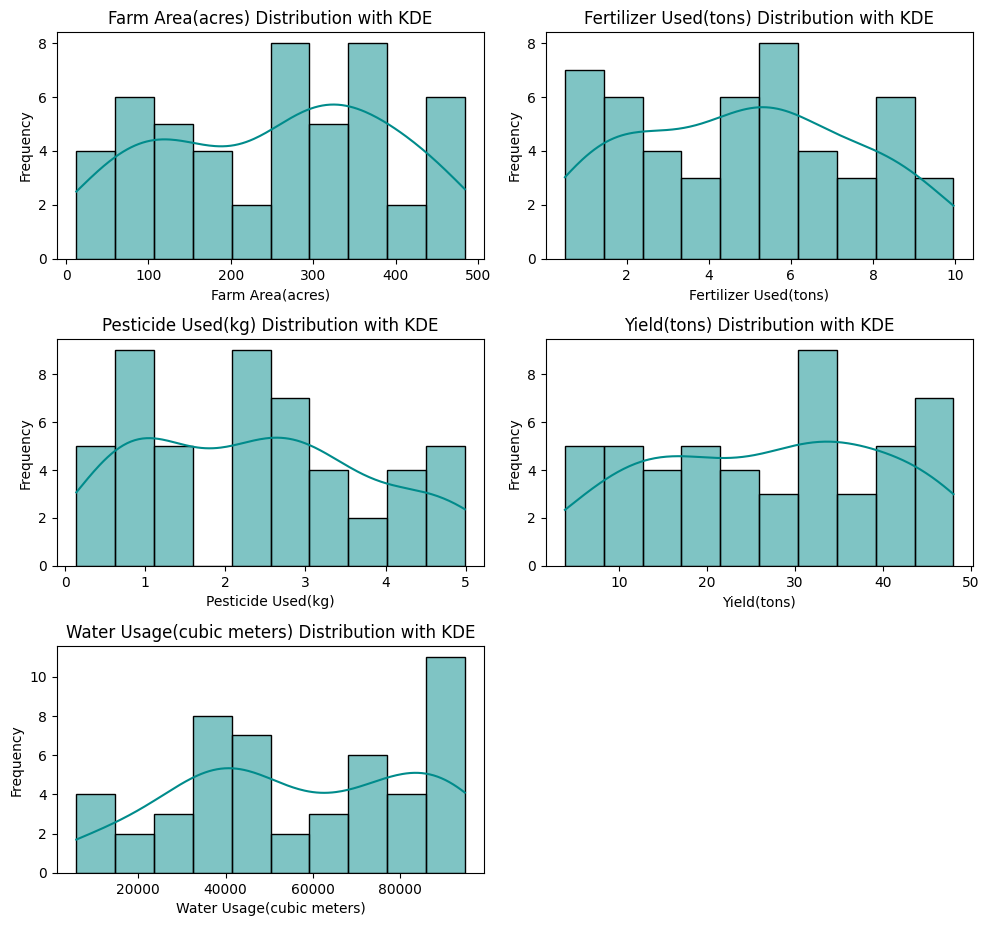

In [19]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))

    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.histplot(data[column], kde=True, bins=10, color='darkcyan')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

univariate_analysis(df, columns_to_analyze)

Analysis of the numerical columns:

**Farm Area (acres):**

The distribution is relatively wide, with farm areas ranging from small to large plots. The histogram shows a slightly right-skewed pattern, suggesting that while many farms have moderate areas, there are a few larger farms as well.

**Fertilizer Used (tons):**

The distribution of fertilizer usage shows a peak around the middle values with a few farms using significantly higher amounts. This may indicate a common range of fertilizer requirements across farms, with only a few outliers.

**Pesticide Used (kg):**

Pesticide usage appears to be left-skewed, with many farms using relatively low quantities, while a few farms use substantially higher amounts.

**Yield (tons):**

Yield distribution is slightly right-skewed, with a majority of farms achieving moderate yields and some achieving much higher yields. This spread might reflect differences in crop type, farm size, and input efficiency.

**Water Usage (cubic meters):**

Water usage has a wide range and a right-skewed distribution. Some farms consume significantly more water, possibly due to crop requirements, irrigation methods, or farm size.

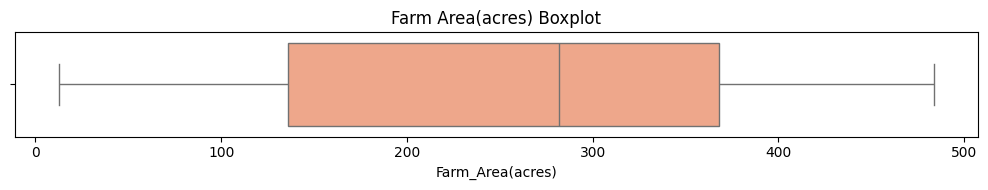


Summary Statistics for Farm Area(acres):
 count     50.000000
mean     254.963800
std      139.417782
min       12.500000
25%      135.710000
50%      281.980000
75%      368.107500
max      483.880000
Name: Farm_Area(acres), dtype: float64


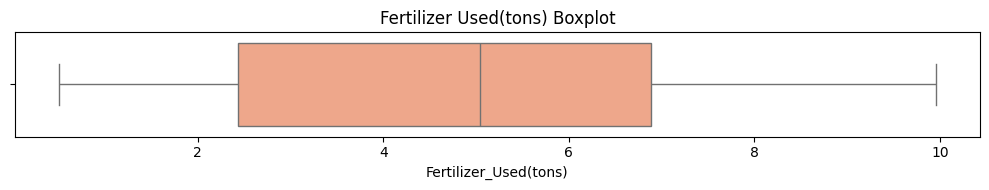


Summary Statistics for Fertilizer Used(tons):
 count    50.000000
mean      4.905400
std       2.732689
min       0.500000
25%       2.437500
50%       5.045000
75%       6.885000
max       9.960000
Name: Fertilizer_Used(tons), dtype: float64


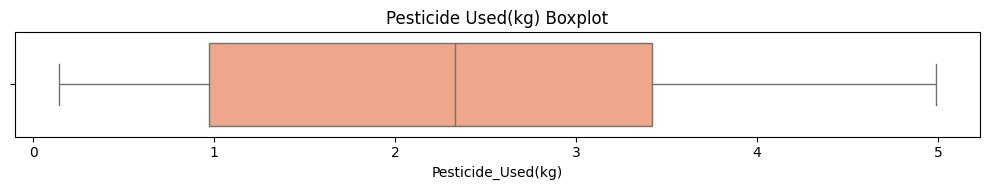


Summary Statistics for Pesticide Used(kg):
 count    50.000000
mean      2.398000
std       1.438613
min       0.140000
25%       0.972500
50%       2.330000
75%       3.417500
max       4.990000
Name: Pesticide_Used(kg), dtype: float64


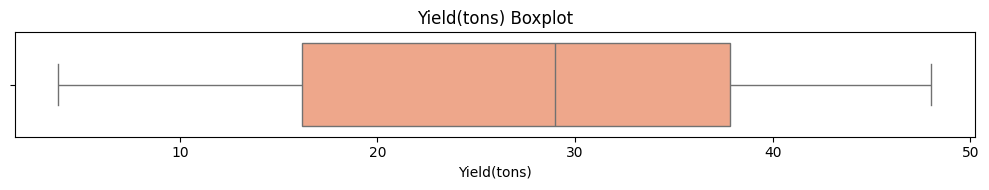


Summary Statistics for Yield(tons):
 count    50.000000
mean     27.059200
std      13.345789
min       3.860000
25%      16.190000
50%      28.970000
75%      37.860000
max      48.020000
Name: Yield(tons), dtype: float64


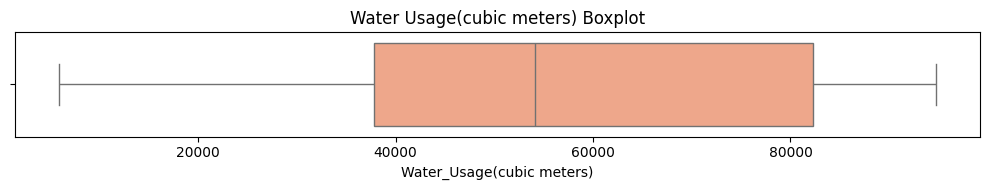


Summary Statistics for Water Usage(cubic meters):
 count       50.000000
mean     56724.295600
std      27264.992053
min       5869.750000
25%      37818.152500
50%      54097.075000
75%      82240.032500
max      94754.730000
Name: Water_Usage(cubic meters), dtype: float64


In [20]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    sns.boxplot(x=data[column], color='lightsalmon')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

**Insights based on the boxplots and summary statistics:**

**Farm Area (acres):**

Range: The farm area varies significantly, from as low as 12.5 acres to as high as 483.88 acres.
Distribution: The median farm area is around 282 acres, with a relatively wide interquartile range (IQR), suggesting variability in farm sizes.
Potential Outliers: Larger farms may act as outliers in this distribution, as indicated by the spread on the higher end.

**Fertilizer Used (tons):**

Range: Fertilizer usage ranges from 0.5 to 9.96 tons, with an average of about 4.9 tons.
Distribution: The IQR shows that most farms use between approximately 2.4 and 6.9 tons. There are likely a few farms using higher quantities as outliers.

**Pesticide Used (kg):**

Range: Pesticide usage ranges from 0.14 to 4.99 kg, with a mean around 2.4 kg.
Distribution: The median value is around 2.33 kg, with some farms using significantly more, likely representing outliers.

**Yield (tons):**

Range: Crop yield ranges from 3.86 to 48.02 tons, with an average yield of 27.06 tons.
Distribution: The central IQR indicates yields primarily between 16.19 and 37.86 tons, suggesting variability depending on factors like crop type and farm size.

**Water Usage (cubic meters):**

Range: Water usage shows a wide range, from 5,869.75 to 94,754.73 cubic meters.
Distribution: The median is around 54,097 cubic meters, with a large IQR. Some farms use exceptionally high quantities of water, which could reflect outliers due to factors like farm size or crop water needs.

In [21]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)

    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

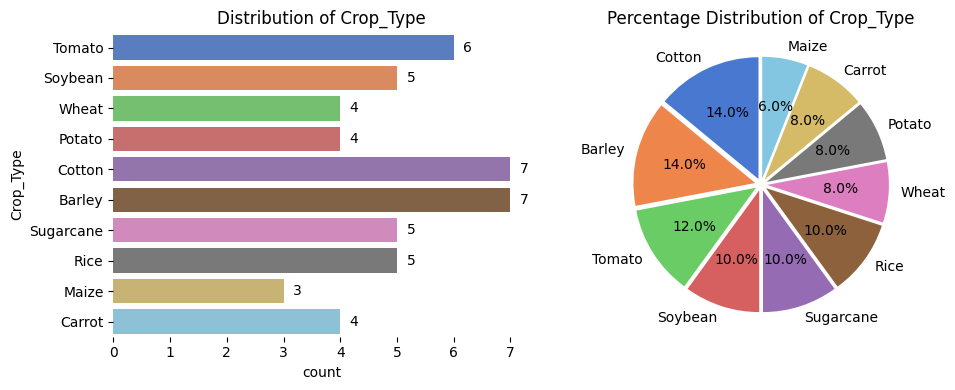

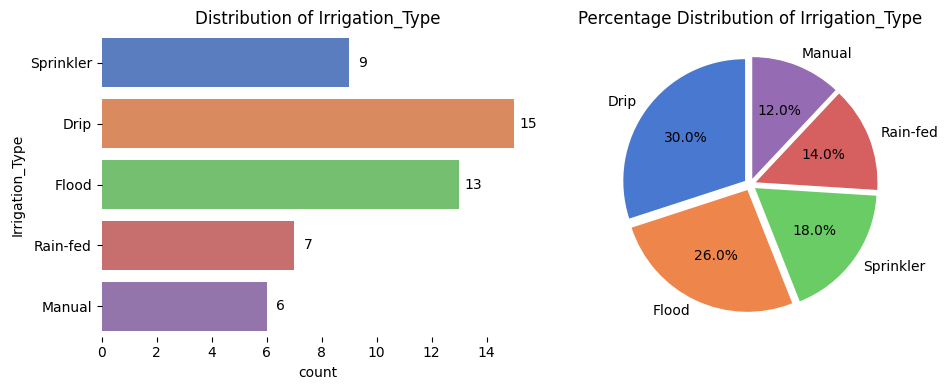

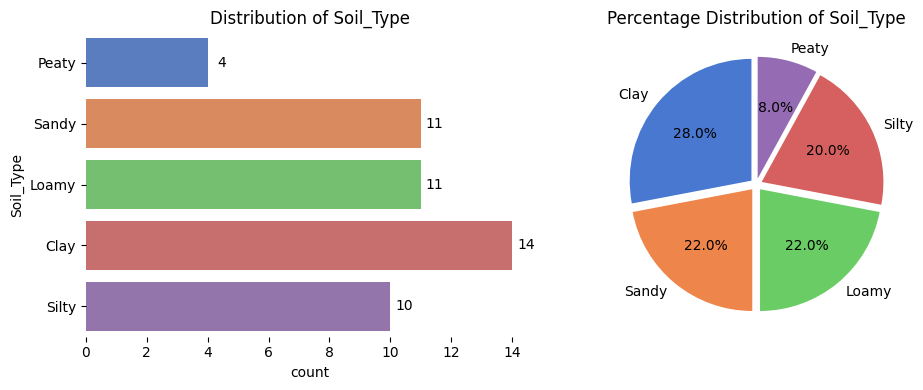

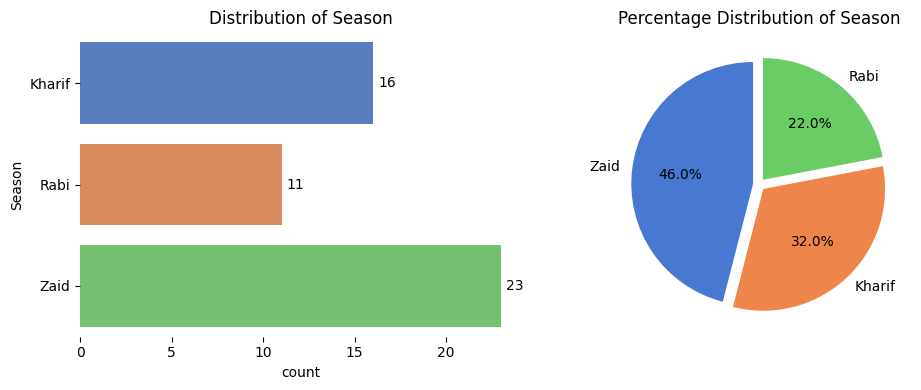

In [22]:
plot_categorical_distribution('Crop_Type')
plot_categorical_distribution('Irrigation_Type')
plot_categorical_distribution('Soil_Type')
plot_categorical_distribution('Season')

**Insights based on the categorical distributions:**

**1. Crop Type:**

Distribution: The dataset includes a variety of crops, with certain crops like Cotton, Carrot, and Tomato appearing more frequently. Other crops such as Potato and Barley are less common.

Percentage: The distribution of crop types is fairly diverse, indicating a range of crops cultivated across different farms. This variety could impact resource needs and yields.

**2. Irrigation Type:**

Distribution: Irrigation methods vary, with Sprinkler and Manual methods being more prevalent. Drip and Rain-fed methods are less common.

Percentage: The distribution suggests that traditional methods like Manual and Sprinkler irrigation are dominant, potentially influencing water and fertilizer usage.

**3. Soil Type:**

Distribution: There is a relatively balanced representation of soil types, with Loamy and Silty soils being the most common, followed by Peaty, Clay, and Sandy.

Percentage: This balance across soil types indicates a range of soil conditions that might affect crop selection and yield potential.

**4. Season:**

Distribution: The Kharif season appears to be the most common, followed by Zaid and Rabi seasons.

Percentage: This suggests that a significant portion of farming activities takes place during the Kharif season, potentially due to seasonal crop cycles and climate conditions.

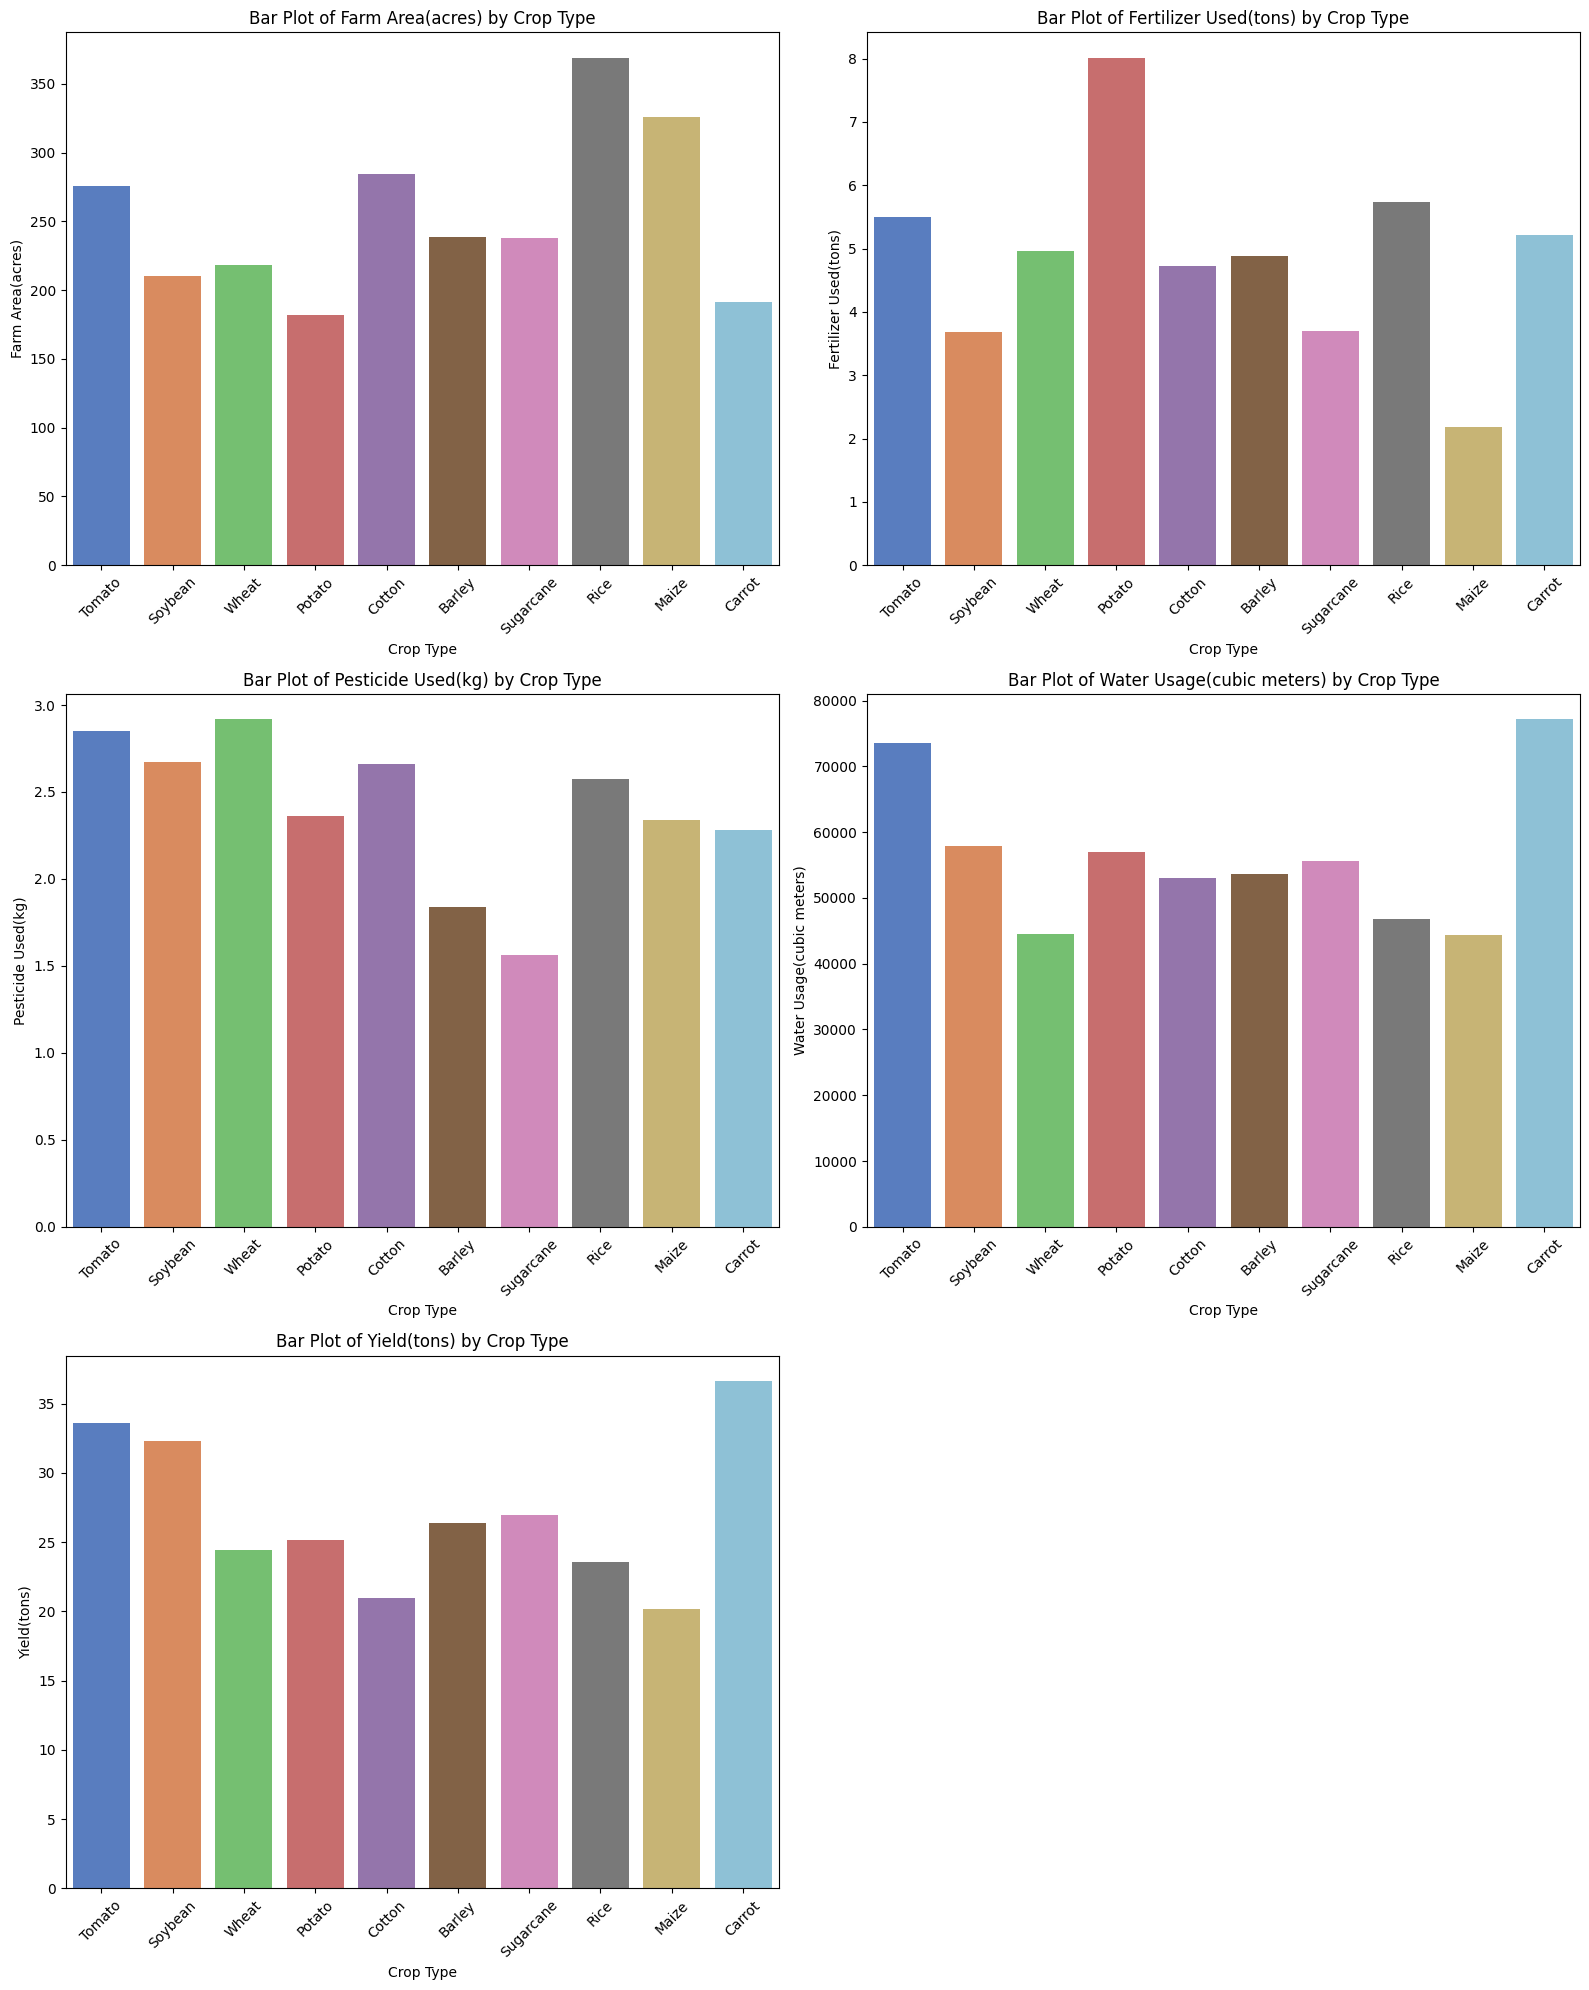

In [23]:
# Creating bar plots for each column by 'Crop_Type'
columns_to_plot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Water_Usage(cubic meters)', 'Yield(tons)']

plt.figure(figsize=(16, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df, x='Crop_Type', y=column, ci=None, palette='muted')
    plt.title(f'Bar Plot of {column.replace("_", " ")} by Crop Type')
    plt.xlabel('Crop Type')
    plt.ylabel(column.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# Identifying crop types with highest and lowest values for different metrics
# Creating a more readable output format
metrics_summary = {
    "Metric": [
        "Highest Yield", "Lowest Yield",
        "Highest Fertilizer Used", "Lowest Fertilizer Used",
        "Highest Pesticide Used", "Lowest Pesticide Used",
        "Highest Water Usage", "Lowest Water Usage",
        "Highest Farm Area", "Lowest Farm Area"
    ],
    "Crop Type": [
        df.loc[df['Yield(tons)'].idxmax()]['Crop_Type'], df.loc[df['Yield(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Crop_Type'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Crop_Type'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Crop_Type'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Crop_Type'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Crop_Type'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Crop_Type'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Crop_Type'], df.loc[df['Farm_Area(acres)'].idxmin()]['Crop_Type']
    ],
    "Value": [
        df.loc[df['Yield(tons)'].idxmax()]['Yield(tons)'], df.loc[df['Yield(tons)'].idxmin()]['Yield(tons)'],
        df.loc[df['Fertilizer_Used(tons)'].idxmax()]['Fertilizer_Used(tons)'], df.loc[df['Fertilizer_Used(tons)'].idxmin()]['Fertilizer_Used(tons)'],
        df.loc[df['Pesticide_Used(kg)'].idxmax()]['Pesticide_Used(kg)'], df.loc[df['Pesticide_Used(kg)'].idxmin()]['Pesticide_Used(kg)'],
        df.loc[df['Water_Usage(cubic meters)'].idxmax()]['Water_Usage(cubic meters)'], df.loc[df['Water_Usage(cubic meters)'].idxmin()]['Water_Usage(cubic meters)'],
        df.loc[df['Farm_Area(acres)'].idxmax()]['Farm_Area(acres)'], df.loc[df['Farm_Area(acres)'].idxmin()]['Farm_Area(acres)']
    ]
}

import pandas as pd
metrics_summary_df = pd.DataFrame(metrics_summary)
metrics_summary_df

,Metric,Crop Type,Value
0,Highest Yield,Tomato,48.02
1,Lowest Yield,Maize,3.86
2,Highest Fertilizer Used,Cotton,9.96
3,Lowest Fertilizer Used,Cotton,0.50
4,Highest Pesticide Used,Rice,4.99
5,Lowest Pesticide Used,Barley,0.14
6,Highest Water Usage,Cotton,94754.73
7,Lowest Water Usage,Rice,5869.75
8,Highest Farm Area,Rice,483.88
9,Lowest Farm Area,Sugarcane,12.50


**Explanations based on the summary of crop metrics:**

**1. Yield Insights:**

**Highest Yield:** Tomato has the highest yield at 48.02 tons, indicating its potential as a highly productive crop under favorable conditions.

Lowest Yield: **bold text** Maize has the lowest yield at 3.86 tons, which could suggest challenges in cultivation, lower productivity, or constraints due to environmental or management factors.

**2. Fertilizer Usage:**

**Highest Fertilizer Usage:** Cotton stands out with the highest fertilizer usage at 9.96 tons, suggesting a high nutrient demand for maximizing productivity.

**Lowest Fertilizer Usage:** Interestingly, Cotton also has the lowest fertilizer usage at 0.50 tons for certain instances, which could reflect variability in management practices or differing needs across different fields.

**3. Pesticide Usage**:

**Highest Pesticide Usage:** Rice uses the highest amount of pesticides at 4.99 kg, which may indicate higher susceptibility to pests and the need for more intensive pest management.

**Lowest Pesticide Usage:** Barley, on the other hand, has the lowest pesticide usage at 0.14 kg, suggesting it may be less prone to pest attacks or is managed with minimal chemical intervention.

**4. Water Usage:**

**Highest Water Usage:** Cotton has the highest water usage, consuming 94,754.73 cubic meters. This highlights the water-intensive nature of Cotton cultivation, which may have implications for irrigation and sustainability.

**Lowest Water Usage:** Rice, despite being a typically water-demanding crop, shows the lowest water usage at 5,869.75 cubic meters, potentially due to different cultivation methods, such as more water-efficient practices.

**5. Farm Area:**

**Highest Farm Area:** Rice is cultivated on the largest farm area, with 483.88 acres, indicating its importance or high demand in the region.

**Lowest Farm Area:** Sugarcane has the smallest farm area at 12.50 acres, which could reflect niche cultivation or limited demand.


This insights illustrate significant variability in resource usage, productivity, and farm area across different crop types. Cotton and Rice, for example, demonstrate contrasting needs and environmental demands, impacting their cultivation practices. Tomato's high yield makes it particularly productive, while Maize’s low yield points to potential areas for improvement or challenges to address. Such data is valuable for optimizing agricultural practices and improving crop productivity and sustainability.

In [25]:
# Create a table showing Crop Types and corresponding Farm IDs for each crop type

crop_farm_table = df.groupby('Crop_Type')['Farm_ID'].apply(list).reset_index()

crop_farm_table

,Crop_Type,Farm_ID
0,Barley,"[F031, F049, F016, F033, F025, F020, F038]"
1,Carrot,"[F017, F032, F046, F002]"
2,Cotton,"[F039, F001, F036, F040, F027, F021, F043]"
3,Maize,"[F009, F019, F018]"
4,Potato,"[F030, F047, F048, F023]"
5,Rice,"[F008, F024, F041, F011, F014]"
6,Soybean,"[F007, F037, F044, F035, F010]"
7,Sugarcane,"[F012, F042, F015, F006, F003]"
8,Tomato,"[F045, F005, F004, F028, F034, F050]"
9,Wheat,"[F026, F013, F022, F029]"


In [26]:
# Checking if any farms have multiple crop types

multiple_crops_per_farm = df.groupby('Farm_ID')['Crop_Type'].nunique().reset_index()
multiple_crops_per_farm = multiple_crops_per_farm[multiple_crops_per_farm['Crop_Type'] > 1]

# Displaying the result or a message if no farm has multiple crops

if not multiple_crops_per_farm.empty:
    import ace_tools as tools; tools.display_dataframe_to_user(name="Farms with Multiple Crop Types", dataframe=multiple_crops_per_farm)
else:
    print("No farms have multiple crop types.")

No farms have multiple crop types.


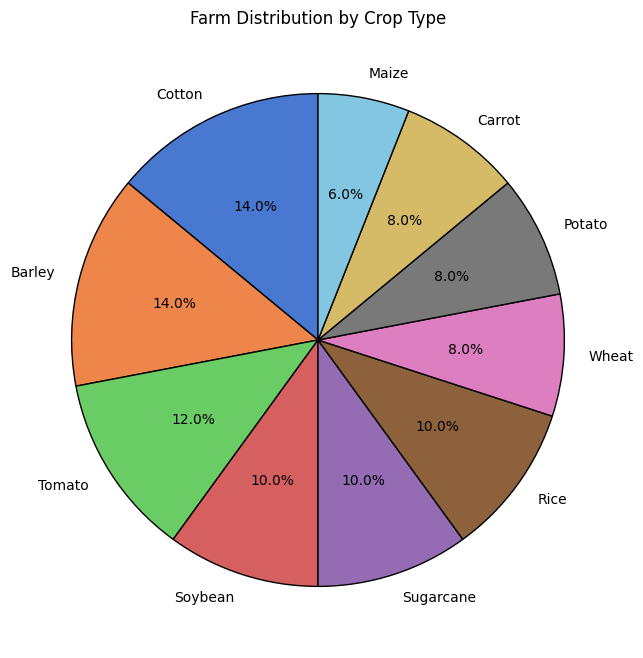

In [27]:
# Plotting the pie chart for farm distribution by crop type

plt.figure(figsize=(8, 8))
crop_type_counts = df['Crop_Type'].value_counts()
plt.pie(crop_type_counts, labels=crop_type_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Distribution by Crop Type')
plt.show()

**Explanations based on the analysis and visualizations:**

**1. Crop Type and Farm Association:**

  Each crop type is associated with a distinct set of farms, and no single farm grows multiple crop types. This setup may imply a specialization in crop cultivation, where each farm is focused on a single crop, possibly to optimize resources and expertise for specific crop needs.

  Most Common Crops: Certain crops like Barley, Cotton, and Tomato are associated with multiple farms, while others like Maize have fewer farms. This distribution could reflect the popularity or economic value of these crops in the dataset's region.

**2. Farm Distribution by Crop Type (Pie Chart):**

  The pie chart provides a visual distribution of farms across crop types. We can see that the largest segments represent crops with a broader farm base, such as Cotton and Barley. In contrast, smaller segments correspond to crops like Maize and Potato, indicating fewer farms cultivate these crops.
  
  This distribution can help identify crop popularity and farming focus within the dataset, potentially indicating the region’s agricultural strengths or specific crop demands.

**3. Specialization of Farms:**

  Since no farm grows multiple crop types, each farm’s focus on a single crop type could reflect specialized farming practices or crop rotations that don’t overlap within the same season. This setup might also be due to factors like soil suitability, water availability, or climate requirements specific to each crop.

In [28]:
# Calculating the total area for each crop type

total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum().reset_index()

total_area_per_crop

,Crop_Type,Farm_Area(acres)
0,Barley,1671.22
1,Carrot,765.90
2,Cotton,1993.80
3,Maize,978.53
4,Potato,727.24
5,Rice,1845.24
6,Soybean,1050.68
7,Sugarcane,1187.99
8,Tomato,1655.02
9,Wheat,872.57


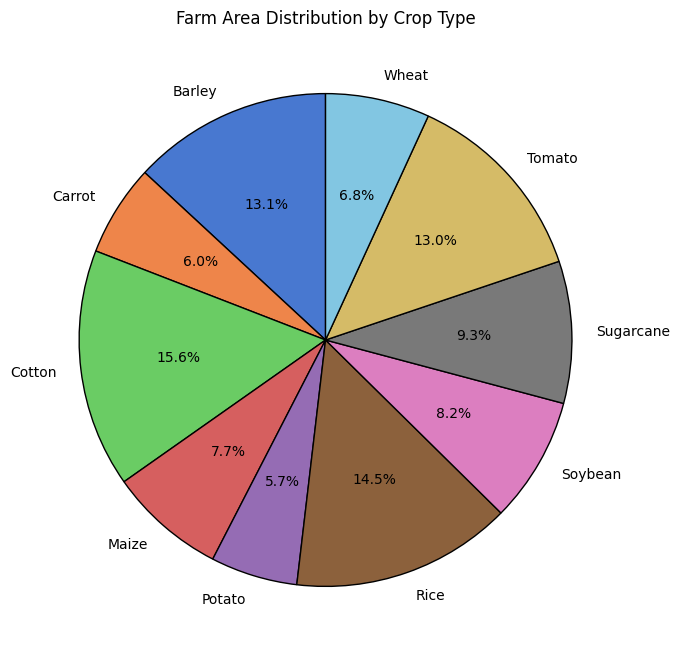

In [29]:
# Plotting a pie chart for the distribution of total Farm_Area(acres) by crop type

plt.figure(figsize=(8, 8))
total_area_per_crop = df.groupby('Crop_Type')['Farm_Area(acres)'].sum()

plt.pie(total_area_per_crop, labels=total_area_per_crop.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('muted'), wedgeprops={'edgecolor': 'black'})

plt.title('Farm Area Distribution by Crop Type')
plt.show()

**Insights based on the distribution of total farm area by crop typ**e

**1. Largest Farm Areas:**

  **Cotton** (1,993.80 acres), **Rice** (1,845.24 acres), and **Barley** (1,671.22 acres) occupy the largest total farm areas. This suggests that these crops may be highly prioritized or economically significant within the dataset’s region.

**2. Moderate Farm Areas:**

  **Tomato** (1,655.02 acres),** Sugarcane** (1,187.99 acres), and **Soybean** (1,050.68 acres) have substantial but moderate land allocation. These crops still represent a significant part of the agricultural landscape, albeit not as prominent as Cotton and Rice.

**3. Smaller Farm Areas:**

**Carrot** (765.90 acres), **Wheat** (872.57 acres), **Maize** (978.53 acres), and **Potato** (727.24 acres) have the smallest total areas. These crops may either be less in demand or require less land due to specific cultivation practices.

**Overall Observations**:

  The distribution of farm area across crop types highlights the emphasis on certain staple crops like Cotton, Rice, and Barley, which are given more land, possibly for economic or agricultural reasons.

  The pie chart visually convey the land allocation, with larger crops clearly standing out, offering a quick visual reference for priority crops in terms of land use.

In [30]:
# Identifying the crop types and the corresponding soil types they grow in

crop_soil_table = df.groupby('Crop_Type')['Soil_Type'].unique().reset_index()

crop_soil_table

,Crop_Type,Soil_Type
0,Barley,"[Clay, Sandy, Loamy, Silty]"
1,Carrot,"[Loamy, Clay, Peaty]"
2,Cotton,"[Clay, Loamy, Sandy]"
3,Maize,"[Peaty, Sandy, Loamy]"
4,Potato,"[Loamy, Sandy, Silty]"
5,Rice,"[Silty, Clay, Sandy]"
6,Soybean,"[Sandy, Loamy, Silty]"
7,Sugarcane,"[Clay, Peaty, Loamy, Silty]"
8,Tomato,"[Peaty, Clay, Silty, Loamy]"
9,Wheat,"[Loamy, Clay, Silty]"


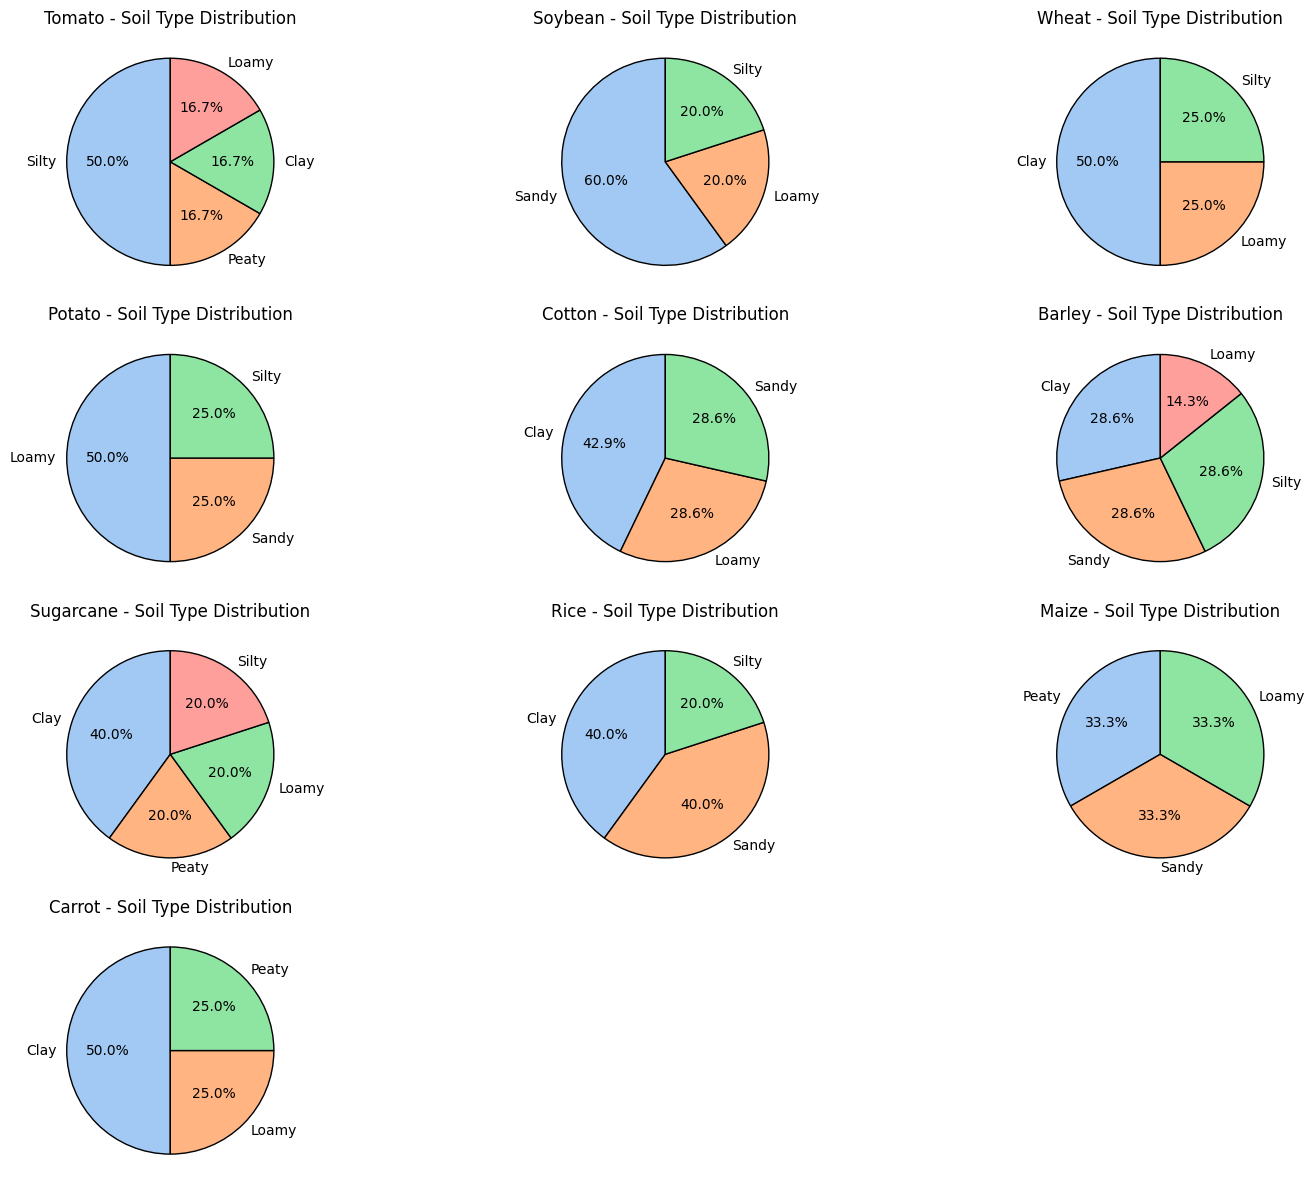

In [31]:
# Plotting pie charts for each crop type to show distribution of soil types they grow in.

unique_crops = df['Crop_Type'].unique()

# Set up a grid for multiple pie charts.

plt.figure(figsize=(15, 12))
for i, crop in enumerate(unique_crops, 1):
    plt.subplot(4, 3, i)
    soil_distribution = df[df['Crop_Type'] == crop]['Soil_Type'].value_counts()
    plt.pie(soil_distribution, labels=soil_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Soil Type Distribution')

plt.tight_layout()
plt.show()

**Explanations based on the soil type distribution for each crop type**:

**1. Diverse Soil Types:**

Certain crops like **Barley**, **Tomato** and **Sugarcane** are grown in a wide variety of soil types, including Sandy, Silty, Clay, and Loamy. This indicates that these crops are versatile and adaptable to multiple soil conditions.

**2. Limited Soil Preferences:**

Crops like **Carrot** and **Soybean** are associated with fewer soil types. For example, Carrot is primarily found in Peaty, Loamy, and Clay soils, while Soybean predominantly grows in Sandy, Silty, and Loamy soils. This could suggest a more specific soil preference or suitability for these crops.

**3. Predominant Soil Types:**

Sandy and Loamy soils are common across multiple crops, including **Cotton**, **Rice**, and **Soybean**. This prevalence indicates that these soil types are likely more suitable or widely available for various crops in the dataset.

**4. Unique Soil Associations:**

Peaty soil is less commonly associated with crops, appearing mainly with **Carrot**, **Sugarcane**, **Maize**, and **Tomato**. This may indicate that Peaty soil is less prevalent or less suitable for a broad range of crops, except for a few specialized types.

**5. Adaptable Crops:**

**Sugarcane**,**Tomato** and **Barley** grow in a variety of soil types, including Loamy, Silty, Clay, and Peaty soils. This adaptability makes them versatile crops, potentially less affected by soil type variability.

In [32]:
# Identifying the crop types and the corresponding seasons they are grown in.

crop_season_table = df.groupby('Crop_Type')['Season'].unique().reset_index()

crop_season_table

,Crop_Type,Season
0,Barley,"[Zaid, Kharif]"
1,Carrot,"[Zaid, Rabi, Kharif]"
2,Cotton,"[Zaid, Kharif, Rabi]"
3,Maize,"[Rabi, Zaid]"
4,Potato,"[Zaid, Kharif]"
5,Rice,"[Kharif, Zaid, Rabi]"
6,Soybean,"[Rabi, Zaid, Kharif]"
7,Sugarcane,"[Kharif, Zaid]"
8,Tomato,"[Kharif, Zaid, Rabi]"
9,Wheat,"[Rabi, Zaid]"


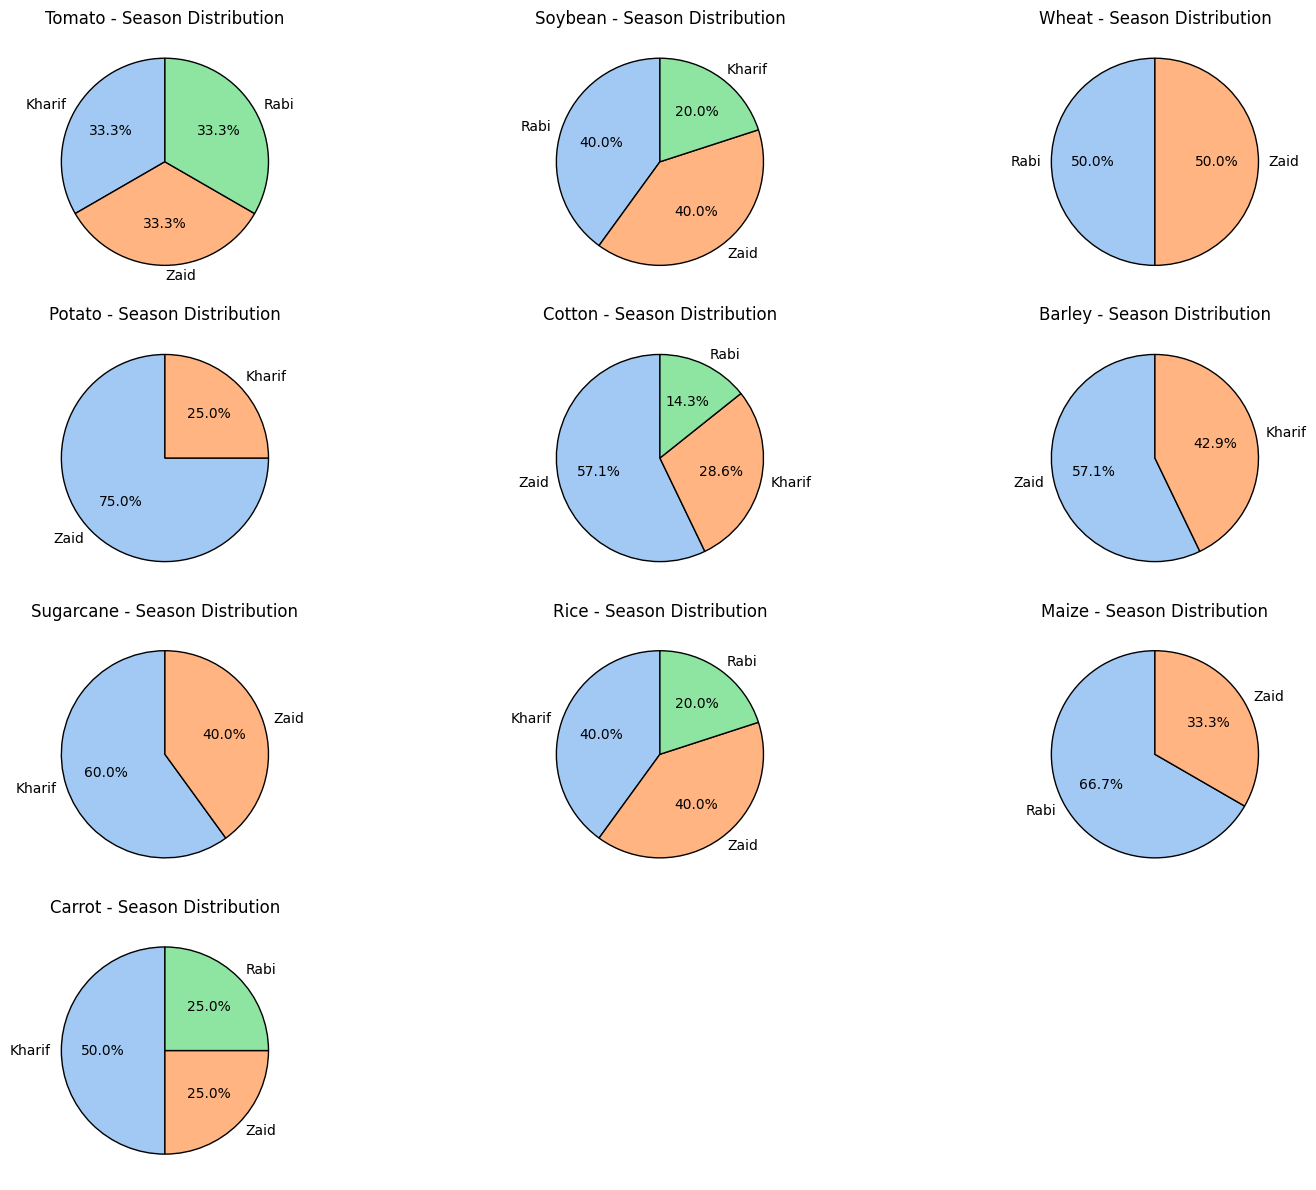

In [33]:
# Plotting pie charts for each crop type to show distribution of seasons they are grown in.

plt.figure(figsize=(15, 12))
for i, crop in enumerate(df['Crop_Type'].unique(), 1):
    plt.subplot(4, 3, i)
    season_distribution = df[df['Crop_Type'] == crop]['Season'].value_counts()
    plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
    plt.title(f'{crop} - Season Distribution')

plt.tight_layout()
plt.show()

**Explanations**

**1. Multi-Season Crops:**

  Crops like Carrot, Rice, Soybean, and Tomato are grown across all three seasons (Kharif, Zaid, and Rabi), showcasing their adaptability to different growing conditions and potentially offering continuous yields throughout the year.

  Cotton also spans all seasons but has a higher concentration in the Kharif season, indicating a strong preference for certain climatic conditions during that period.

**2. Season-Specific Crops:**

  Maize and Wheat are grown in two seasons (Rabi and Zaid) but do not appear in the Kharif season. This suggests a preference for specific climatic or soil conditions during Rabi and Zaid.

  Sugarcane is predominantly grown in the Kharif and Zaid seasons, showing a notable absence from Rabi, which might be due to climatic or crop cycle requirements.

**3. Dominant Season for Certain Crops:**

  Potato is primarily grown in the Zaid season (75% of the time) and less in the Kharif season. This suggests a high yield during Zaid, aligning with favorable conditions.

  Barley and Cotton are heavily cultivated during the Kharif and Zaid seasons, indicating their importance and adaptability to these seasons' conditions.

**4. Balanced Crops Across Seasons:**

  Tomato displays a balanced distribution across Kharif, Zaid, and Rabi seasons, indicating it can be cultivated year-round without significant preference toward any single season.

  Wheat has a balanced 50-50 split between Zaid and Rabi, suggesting stable and predictable yields during these times.

**Overall Observations:**

  **Crop Adaptability:** Certain crops like Tomato, Rice, and Carrot are highly versatile, thriving across multiple seasons, whereas others like Maize and Wheat have more focused seasonal windows.

  **Seasonal Preferences:** The distribution of crop types per season highlights the significance of specific climatic and growing conditions needed to optimize yields, which can be critical for planning planting cycles and resource allocation.

In [34]:
# Identifying the soil type with the highest crop yield for each crop type.

highest_yield_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmax()]

print("Soil Type with Highest Yield for Each Crop Type:")
display(max_yield_per_crop)

# Identifying the soil type with the lowest crop yield for each crop type.

min_yield_per_crop = highest_yield_per_crop_soil.loc[highest_yield_per_crop_soil.groupby('Crop_Type')['Yield(tons)'].idxmin()]

print("\n\nSoil Type with Lowest Yield for Each Crop Type:")
display(min_yield_per_crop)

Soil Type with Highest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
1,Barley,Loamy,46.470
5,Carrot,Loamy,47.700
9,Cotton,Sandy,28.820
12,Maize,Sandy,39.960
14,Potato,Sandy,31.470
16,Rice,Clay,33.655
19,Soybean,Loamy,40.150
23,Sugarcane,Loamy,38.180
26,Tomato,Clay,43.280
32,Wheat,Silty,36.900




Soil Type with Lowest Yield for Each Crop Type:


,Crop_Type,Soil_Type,Yield(tons)
2,Barley,Sandy,17.440000
4,Carrot,Clay,27.955000
8,Cotton,Loamy,13.485000
11,Maize,Peaty,3.860000
15,Potato,Silty,20.530000
18,Rice,Silty,4.230000
20,Soybean,Sandy,28.983333
22,Sugarcane,Clay,17.185000
27,Tomato,Loamy,12.920000
30,Wheat,Clay,18.070000


**Summary:**

  **Loamy soil** is generally associated with higher yields for many crops (Barley, Carrot, Soybean, Sugarcane), highlighting its favorable characteristics for plant growth due to its balance of sand, silt, and clay.

  **Sandy soil** supports high yields for crops like Cotton, Maize, and Potato but leads to lower yields for crops like Barley and Soybean, reflecting its mixed suitability depending on crop needs.

  **Clay soil** provides high yields for Rice and Tomato but can negatively impact yields for Carrot, Sugarcane, and Wheat due to its dense structure and water retention characteristics.

Understanding these soil-crop relationships can help optimize crop selection and management practices, enhancing yields based on soil conditions.

In [35]:
# Identifying the soil type with the highest Fertilizer Used for each crop type.

highest_fertilizer_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Fertilizer_Used(tons)'].mean().reset_index()
max_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmax()]

print("Soil Type with Highest Fertilizer Used for Each Crop Type:")
display(max_fertilizer_per_crop)

# Identifying the soil type with the lowest Fertilizer Used for each crop type.

min_fertilizer_per_crop = highest_fertilizer_per_crop_soil.loc[highest_fertilizer_per_crop_soil.groupby('Crop_Type')['Fertilizer_Used(tons)'].idxmin()]

print("\n\nSoil Type with Lowest Fertilizer Used for Each Crop Type:")
display(min_fertilizer_per_crop)

Soil Type with Highest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
1,Barley,Loamy,7.790
5,Carrot,Loamy,5.890
8,Cotton,Loamy,6.245
10,Maize,Loamy,4.910
13,Potato,Loamy,9.430
16,Rice,Clay,7.165
21,Soybean,Silty,8.570
23,Sugarcane,Loamy,6.420
26,Tomato,Clay,8.330
30,Wheat,Clay,6.105




Soil Type with Lowest Fertilizer Used for Each Crop Type:


,Crop_Type,Soil_Type,Fertilizer_Used(tons)
2,Barley,Sandy,2.900
6,Carrot,Peaty,4.770
9,Cotton,Sandy,2.100
11,Maize,Peaty,0.570
14,Potato,Sandy,3.860
17,Rice,Sandy,4.595
19,Soybean,Loamy,1.180
22,Sugarcane,Clay,1.895
27,Tomato,Loamy,4.750
32,Wheat,Silty,1.790


**Summar:**

**Loamy Soil:** While it often requires high fertilizer input due to its balanced texture and nutrient-holding capacity, it also supports high yields, making the investment in fertilizers worthwhile for many crops.

**Sandy Soil**: Consistently appears with the lowest fertilizer usage, possibly due to its poor retention capabilities, leading to limited absorption and requiring different nutrient management practices.

**Soil-Crop Specificity**: Fertilizer usage varies significantly depending on the crop-soil combination, reflecting complex interactions between soil properties, nutrient needs, and crop characteristics.

These insights can help in optimizing fertilizer management practices to reduce costs and improve yields by targeting specific soil and crop combinations.

In [36]:
 #  Identifying the soil type with the highest Water Usage for each crop type

highest_water_usage_per_crop_soil = df.groupby(['Crop_Type', 'Soil_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil type with the lowest Water Usage for each crop type

min_water_usage_per_crop = highest_water_usage_per_crop_soil.loc[highest_water_usage_per_crop_soil.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results

print("Soil Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\n\nSoil Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)

Soil Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
1,Barley,Loamy,93656.060
5,Carrot,Loamy,88301.460
8,Cotton,Loamy,57761.240
11,Maize,Peaty,60202.140
14,Potato,Sandy,86989.880
17,Rice,Sandy,78580.925
19,Soybean,Loamy,73646.550
25,Sugarcane,Silty,75538.560
26,Tomato,Clay,93718.690
31,Wheat,Loamy,65838.400




Soil Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Water_Usage(cubic meters)
3,Barley,Silty,39956.880000
6,Carrot,Peaty,68725.540000
7,Cotton,Clay,49551.673333
10,Maize,Loamy,18660.030000
15,Potato,Silty,5874.170000
18,Rice,Silty,9392.380000
21,Soybean,Silty,43610.210000
24,Sugarcane,Peaty,33615.770000
28,Tomato,Peaty,37466.110000
32,Wheat,Silty,23208.040000


**Summary:**

**Loamy Soil** often has the highest water usage for multiple crops, reflecting its versatility and high crop yields but also necessitating significant water input.

**Silty Soil** consistently shows the lowest water usage for several crops due to its moisture retention capabilities, reducing the need for excessive irrigation.

**Sandy Soil** demands high water usage for certain crops like Potato and Rice due to its quick drainage properties.

The variability in water usage by soil type emphasizes the importance of choosing the right irrigation strategy based on soil properties and crop needs for optimized water management and crop yield.

These can be valuable for improving water efficiency and resource management in agricultural practices.

In [37]:
# Identifying the soil and irrigation type with the highest Water Usage for each crop type.

highest_water_usage_per_crop = df.groupby(['Crop_Type', 'Soil_Type', 'Irrigation_Type'])['Water_Usage(cubic meters)'].mean().reset_index()
max_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmax()]

# Identifying the soil and irrigation type with the lowest Water Usage for each crop type.

min_water_usage_per_crop = highest_water_usage_per_crop.loc[highest_water_usage_per_crop.groupby('Crop_Type')['Water_Usage(cubic meters)'].idxmin()]

# Displaying the results.

print("Soil and Irrigation Type with Highest Water Usage for Each Crop Type:")
display(max_water_usage_per_crop)

print("\n\nSoil and Irrigation Type with Lowest Water Usage for Each Crop Type:")
display(min_water_usage_per_crop)

Soil and Irrigation Type with Highest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
2,Barley,Loamy,Drip,93656.060
9,Carrot,Loamy,Manual,88301.460
16,Cotton,Sandy,Flood,94754.730
19,Maize,Peaty,Drip,60202.140
22,Potato,Loamy,Rain-fed,93407.380
26,Rice,Sandy,Flood,78580.925
28,Soybean,Loamy,Manual,73646.550
32,Sugarcane,Clay,Flood,88976.510
37,Tomato,Clay,Sprinkler,93718.690
44,Wheat,Loamy,Flood,65838.400




Soil and Irrigation Type with Lowest Water Usage for Each Crop Type:


,Crop_Type,Soil_Type,Irrigation_Type,Water_Usage(cubic meters)
3,Barley,Sandy,Flood,25132.48
10,Carrot,Peaty,Manual,68725.54
17,Cotton,Sandy,Rain-fed,12007.70
18,Maize,Loamy,Rain-fed,18660.03
24,Potato,Silty,Sprinkler,5874.17
27,Rice,Silty,Drip,9392.38
30,Soybean,Sandy,Manual,40614.40
35,Sugarcane,Peaty,Rain-fed,33615.77
39,Tomato,Peaty,Sprinkler,37466.11
45,Wheat,Silty,Manual,23208.04


**Summary:**

  **Loamy Soil** with various irrigation methods often results in high water usage for many crops, highlighting its moisture retention but also its need for sustained watering.

  **Sandy Soil** tends to have both high and low water usage depending on the crop and irrigation type, reflecting its variability in water retention.

  **Drip and Sprinkler irrigation systems** show both high and low water usage, indicating that while efficient, the crop and soil properties greatly influence water demand.

  **Flood irrigation** often leads to high water usage, particularly for water-intensive crops like Cotton and Rice, emphasizing the inefficiency of this method.

These emphasize the critical interaction between soil, irrigation methods, and water usage efficiency, providing a guide for optimizing water management practices.

In [38]:
# Identifying the season and irrigation type with the highest crop yield for each crop type

highest_yield_per_crop_season_irrigation = df.groupby(['Crop_Type', 'Season', 'Irrigation_Type'])['Yield(tons)'].mean().reset_index()
max_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmax()]

# Identifying the season and irrigation type with the lowest crop yield for each crop type

min_yield_per_crop = highest_yield_per_crop_season_irrigation.loc[highest_yield_per_crop_season_irrigation.groupby('Crop_Type')['Yield(tons)'].idxmin()]

# Displaying the results

print("Season and Irrigation Type with Highest Crop Yield for Each Crop Type:")
display(max_yield_per_crop)

print("\n\nSeason and Irrigation Type with Lowest Crop Yield for Each Crop Type:")
display(min_yield_per_crop)

Season and Irrigation Type with Highest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
2,Barley,Zaid,Drip,46.470
7,Carrot,Zaid,Manual,47.700
13,Cotton,Zaid,Rain-fed,46.190
16,Maize,Zaid,Drip,39.960
17,Potato,Kharif,Drip,31.470
22,Rice,Kharif,Flood,35.010
26,Soybean,Rabi,Drip,44.930
32,Sugarcane,Zaid,Sprinkler,32.235
36,Tomato,Rabi,Flood,48.020
41,Wheat,Zaid,Manual,36.900




Season and Irrigation Type with Lowest Crop Yield for Each Crop Type:


,Crop_Type,Season,Irrigation_Type,Yield(tons)
3,Barley,Zaid,Flood,11.343333
6,Carrot,Rabi,Flood,24.340000
11,Cotton,Zaid,Flood,10.990000
14,Maize,Rabi,Drip,3.860000
18,Potato,Zaid,Drip,18.130000
21,Rice,Kharif,Drip,4.230000
25,Soybean,Kharif,Drip,17.250000
30,Sugarcane,Kharif,Flood,20.760000
35,Tomato,Rabi,Drip,12.920000
40,Wheat,Zaid,Drip,5.440000


**Summary:**

**Drip irrigation**often appears in both high and low-yield scenarios, emphasizing the importance of precise water management for maximizing yields.

**Flood irrigation** is associated with both high and low yields, particularly for crops like Rice, Tomato, and Sugarcane, highlighting its mixed effectiveness depending on crop and season.

**Seasonal Variation**: Many crops achieve their highest yields in the Zaid and Rabi seasons, but low yields can also occur during these periods depending on irrigation practices.

**Manual and Rain-fed irrigation** methods appear effective for certain crops, reflecting the importance of natural rainfall and human intervention in optimizing yields.

These can help guide irrigation and crop management strategies based on season-specific needs and crop characteristics.

In [39]:
# Identifying the season with the highest Pesticide Used for each crop type

highest_pesticide_usage_per_crop_season = df.groupby(['Crop_Type', 'Season'])['Pesticide_Used(kg)'].mean().reset_index()
max_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmax()]


# Identifying the season with the lowest Pesticide Used for each crop type
min_pesticide_usage_per_crop = highest_pesticide_usage_per_crop_season.loc[highest_pesticide_usage_per_crop_season.groupby('Crop_Type')['Pesticide_Used(kg)'].idxmin()]

# Displaying results

print("Season with Highest Pesticide Used for Each Crop Type:")
display(max_pesticide_usage_per_crop)

print("\n\nSeason with Lowest Pesticide Used for Each Crop Type:")
display(min_pesticide_usage_per_crop)

Season with Highest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
0,Barley,Kharif,2.213333
3,Carrot,Rabi,2.940000
5,Cotton,Kharif,3.485000
8,Maize,Rabi,2.850000
10,Potato,Kharif,2.680000
13,Rice,Rabi,3.450000
17,Soybean,Zaid,2.890000
18,Sugarcane,Kharif,1.660000
22,Tomato,Zaid,4.415000
23,Wheat,Rabi,3.030000




Season with Lowest Pesticide Used for Each Crop Type:


,Crop_Type,Season,Pesticide_Used(kg)
1,Barley,Zaid,1.560000
4,Carrot,Zaid,0.810000
6,Cotton,Rabi,0.910000
9,Maize,Zaid,1.310000
11,Potato,Zaid,2.253333
14,Rice,Zaid,1.765000
16,Soybean,Rabi,2.450000
19,Sugarcane,Zaid,1.415000
20,Tomato,Kharif,0.655000
24,Wheat,Zaid,2.805000



**Summary:**

  **Kharif and Rabi Seasons:** These seasons generally have higher pesticide usage for many crops, reflecting increased pest and disease pressures due to climatic conditions such as humidity and temperature.

  **Zaid Season**: This season often shows lower pesticide usage, indicating reduced pest activity due to drier conditions.

  **Crop-Specific Patterns**: Crops like Tomato, Cotton, and Rice tend to have high pesticide requirements during specific seasons, highlighting their vulnerability to pests and diseases during these periods.
  
  **Efficient Pest Management:** Understanding seasonal patterns of pesticide usage can help optimize pest management strategies, reducing costs and improving crop health.

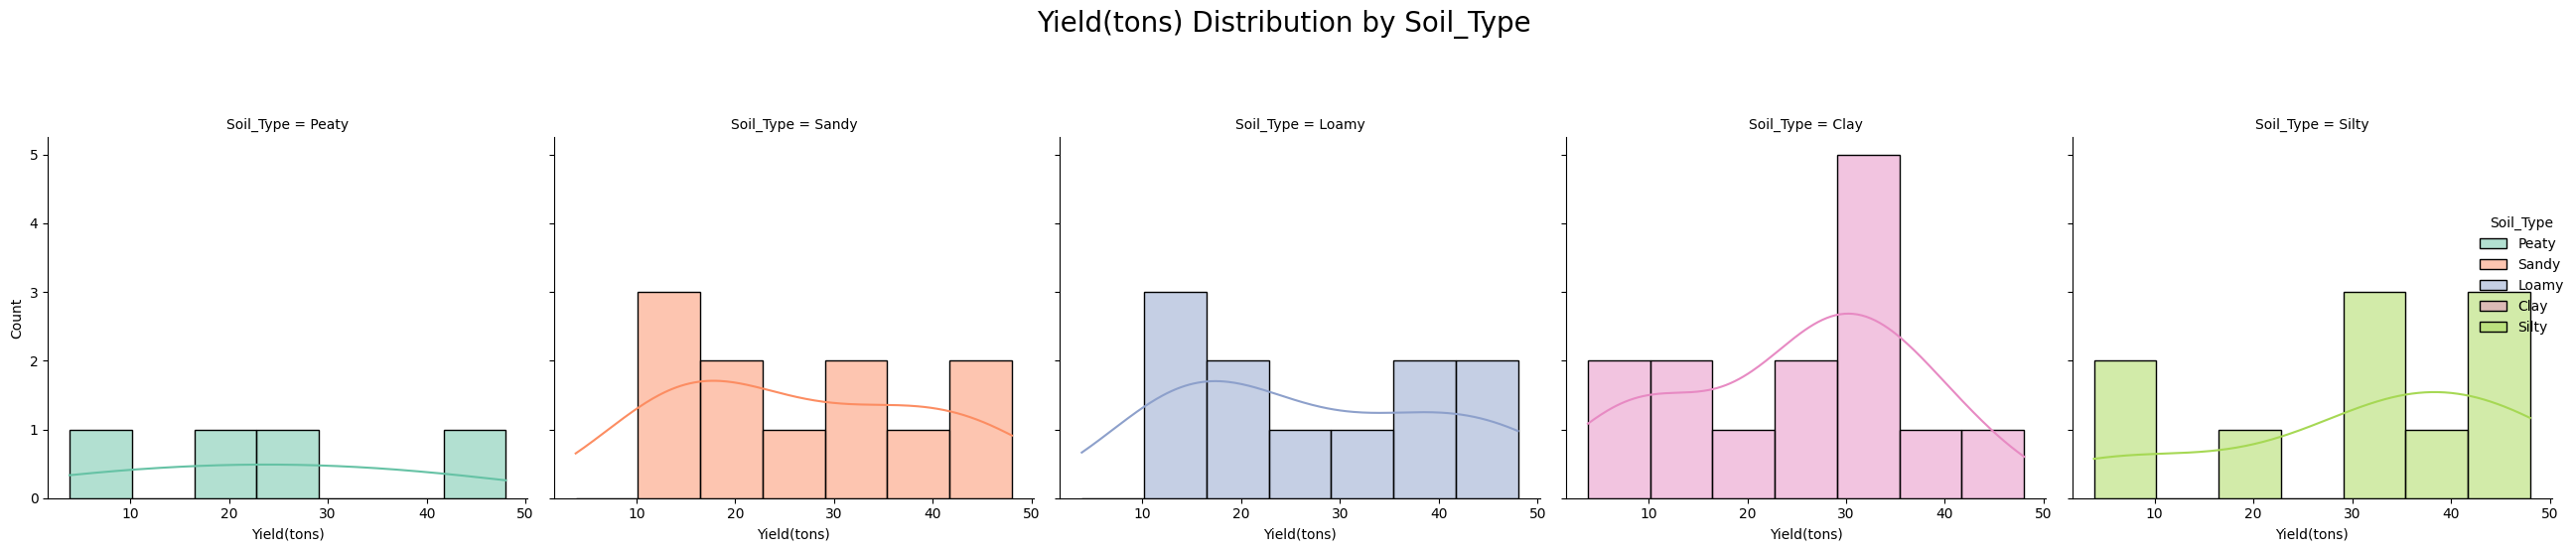

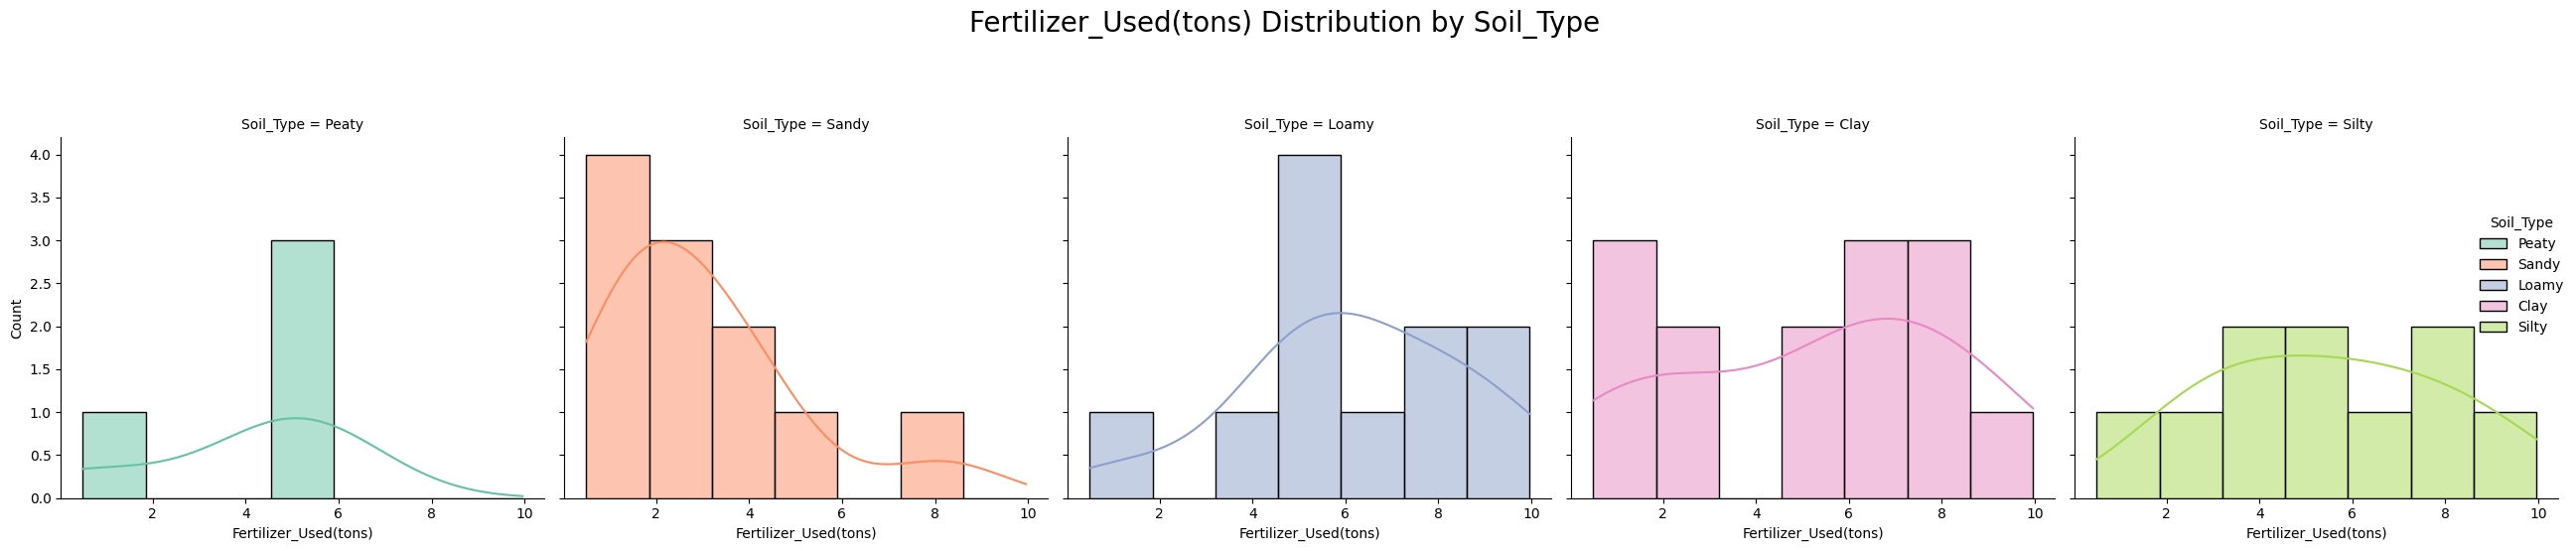

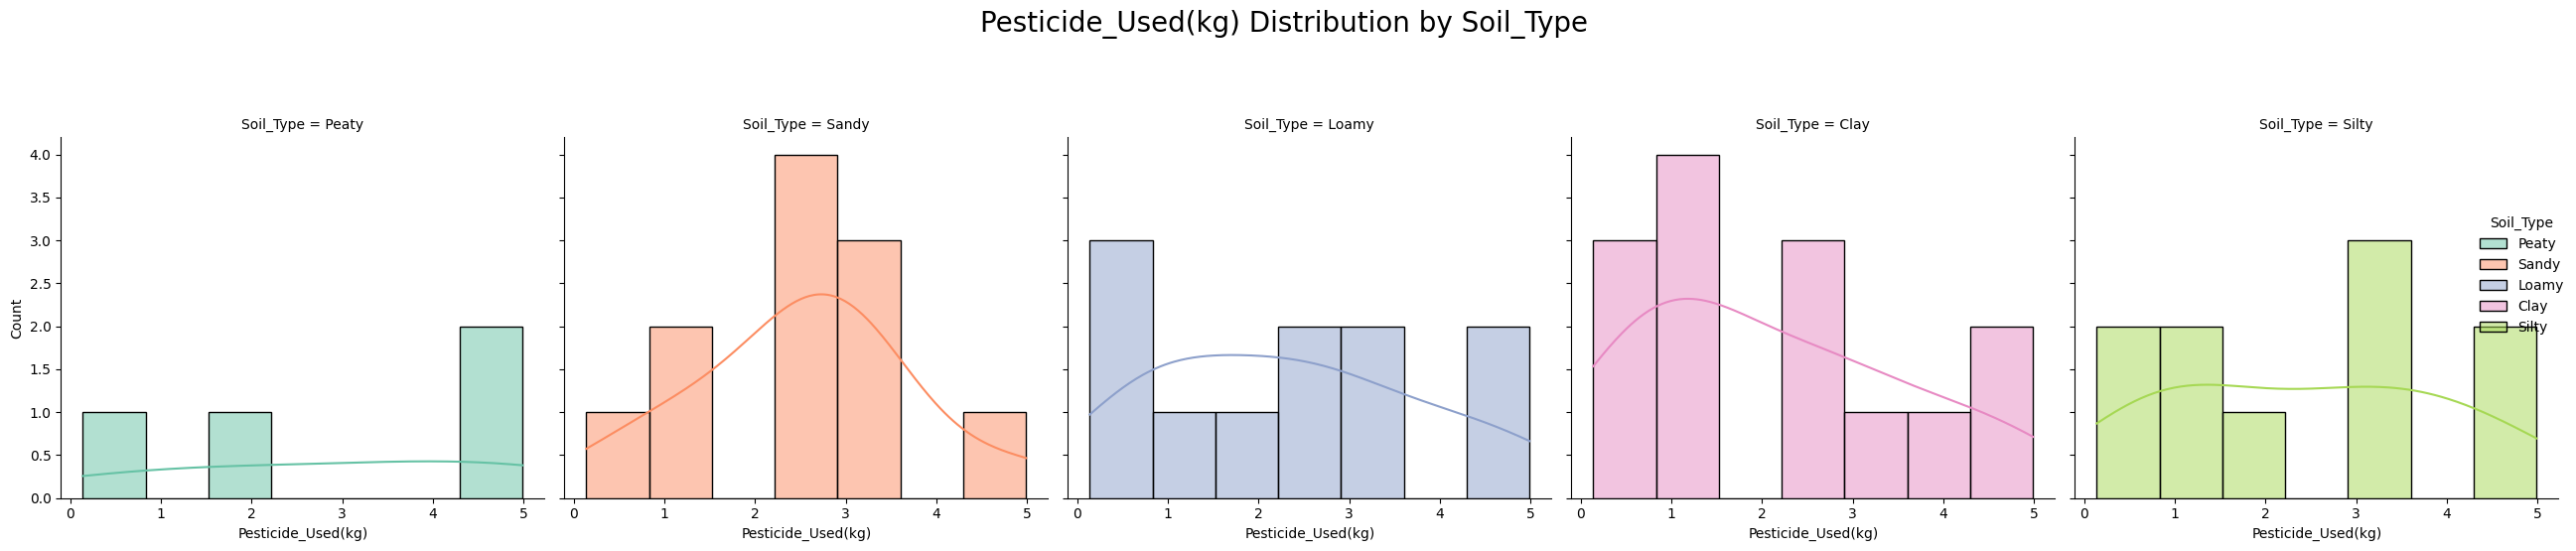

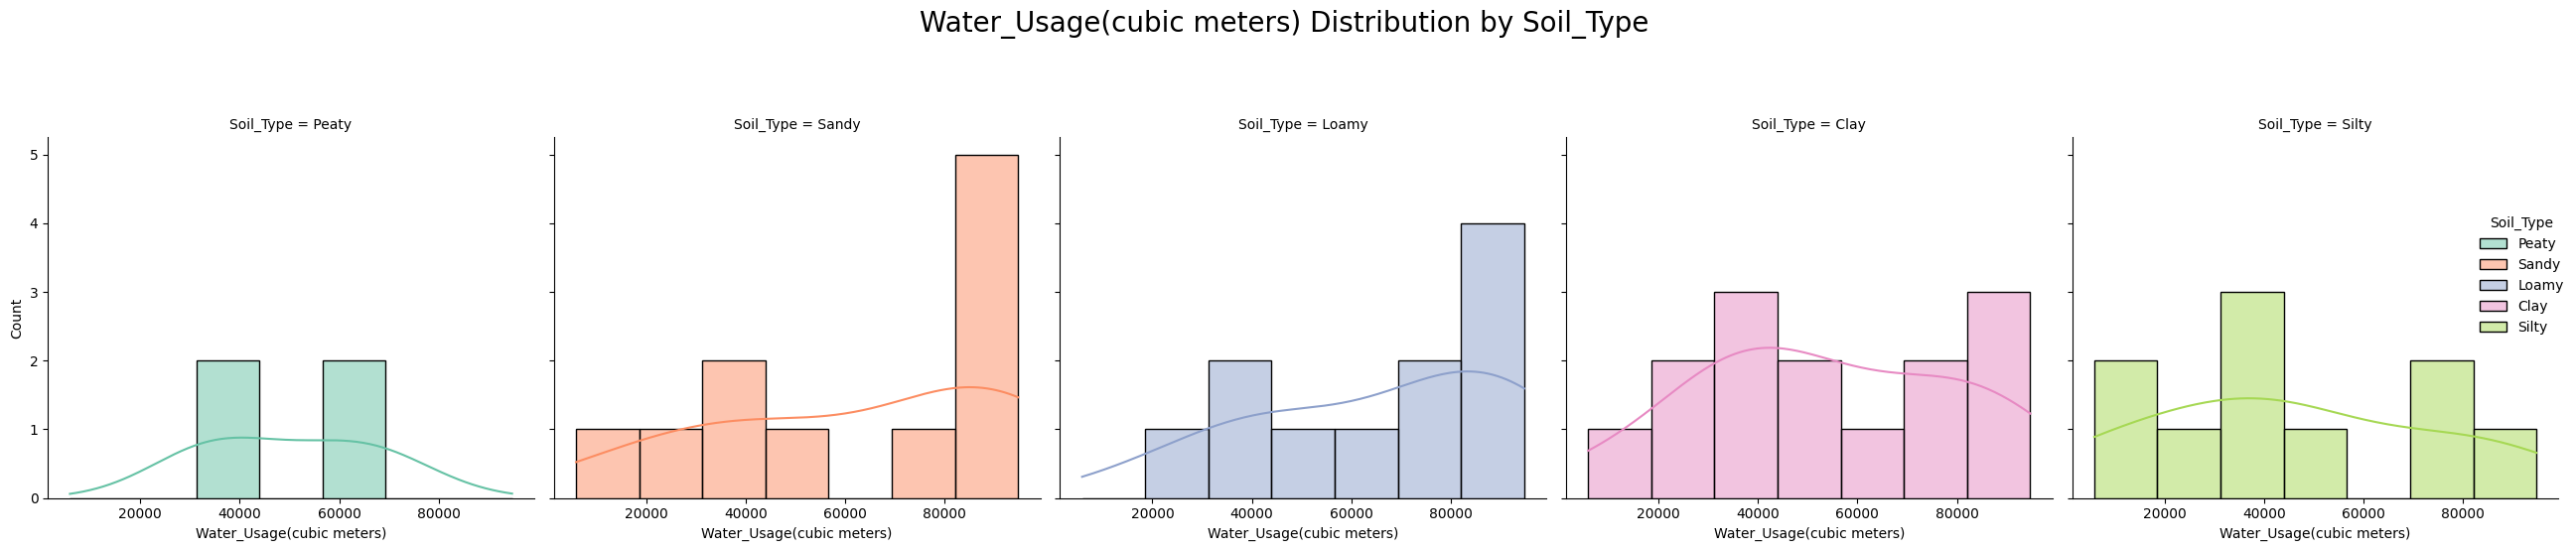

In [40]:
def create_displots(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=20, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Yield(tons)", "Fertilizer_Used(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots(df, columns_to_plot, col='Soil_Type', hue='Soil_Type')

**A summary of how Soil_Type affects the spread and density of each metric**

**1. Yield (tons):**

**Loamy Soil**: Generally exhibits a wide distribution with a higher density at moderate-to-high yield levels, indicating that crops grown in loamy soil often achieve higher yields, but with some variability.

**Sandy and Silty Soils:** Show distributions with narrower peaks, suggesting more consistent yields within a specific range, but often at slightly lower yield levels compared to loamy soil.

**Clay Soil:** Typically displays a moderate distribution with yields clustered around mid-range values, reflecting moderate productivity and some yield variability.

**Peaty Soil:** Shows a more concentrated distribution at lower yields, indicating limited productivity compared to other soil types, with fewer instances of high yields.

**2. Fertilizer Used (tons):**

**Loamy Soil:** Has a broader distribution, indicating higher variability and generally higher fertilizer application rates. This suggests a more intensive fertilization strategy is employed, possibly to maximize crop yield potential.

**Sandy Soil:** Exhibits a narrower distribution with a focus on lower fertilizer usage, likely due to limited nutrient-holding capacity and faster drainage, necessitating careful fertilizer management.

**Clay and Silty Soils:** Tend to have moderate fertilizer usage with a concentrated distribution. Clay’s nutrient-holding capabilities might reduce the need for frequent application, whereas silty soil balances nutrient retention and water management.

**Peaty Soil:** Shows lower overall fertilizer usage, possibly due to its high organic matter content, which can naturally enrich the soil and reduce the need for external inputs.

**3. Pesticide Used (kg):**

**Loamy Soil:** Displays a relatively broad distribution with higher pesticide usage, indicating a potentially higher susceptibility to pests or a strategy of proactive pest management to protect high-value crops.

**Sandy Soil:** Shows a narrower distribution with moderate pesticide use, reflecting fewer instances of severe pest pressures or a tailored pest control approach.

**Clay Soil:** Tends to have a moderate distribution but with slightly lower pesticide usage, possibly due to less susceptibility to certain pests in dense, moisture-retaining conditions.

**Peaty Soil:** Exhibits lower pesticide usage, which may be attributed to its moisture-rich and acidic environment that might naturally deter some pests.

**4. Water Usage (cubic meters):**

**Loamy Soil:** Demonstrates a broad distribution with high water usage, reflecting the high productivity potential but also the water demands associated with maximizing yield in this soil type.

**Sandy Soil:** Shows a wide range but generally indicates high water usage due to its quick-draining properties, requiring more frequent and larger water inputs to maintain crop health.

**Clay Soil:** Typically has a narrower distribution with moderate-to-high water usage. The water retention properties of clay soil may reduce the need for frequent watering but lead to more concentrated irrigation events.

**Silty Soil:** Exhibits moderate water usage with a relatively consistent distribution, reflecting balanced moisture retention and moderate irrigation needs.

**Peaty Soil:** Shows lower water usage, which aligns with its natural moisture-retention capabilities, reducing the need for heavy irrigation.


**Summary Observations:**

**Loamy Soil:** Generally supports higher productivity and shows a broad range of input (fertilizer, pesticide, water) usage, indicating intensive management practices for maximizing yields.

**Sandy Soil:** Requires more careful management of inputs, particularly water, due to quick drainage, and shows moderate pesticide and fertilizer usage.

**Clay Soil:** Offers moderate-to-high productivity with balanced input usage, reflecting its water and nutrient retention properties.

**Peaty Soil:** Shows lower input usage and yields, highlighting its natural fertility but potential limitations in terms of productivity.

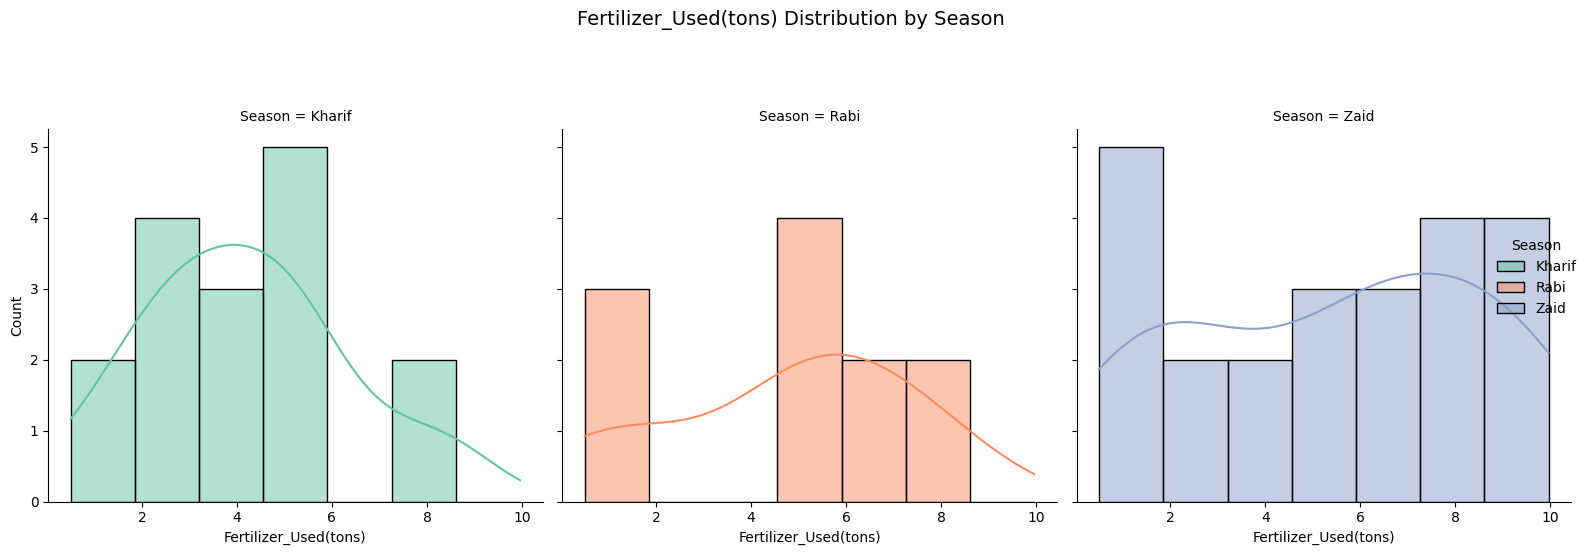

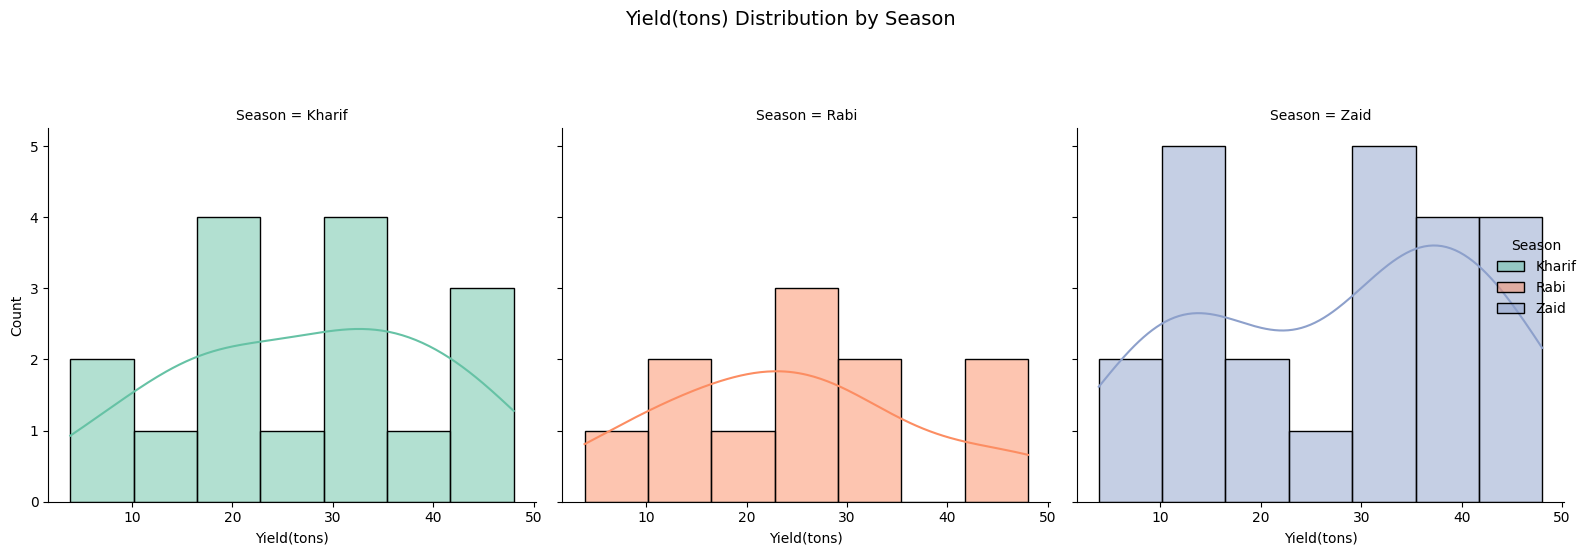

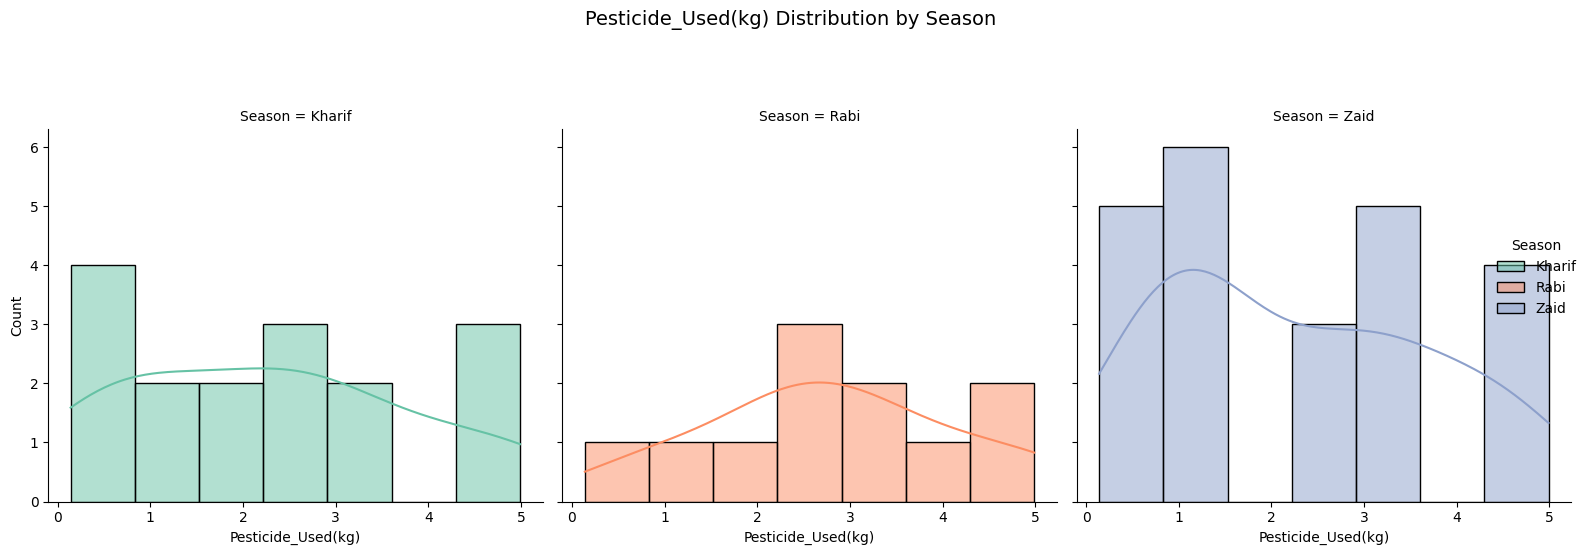

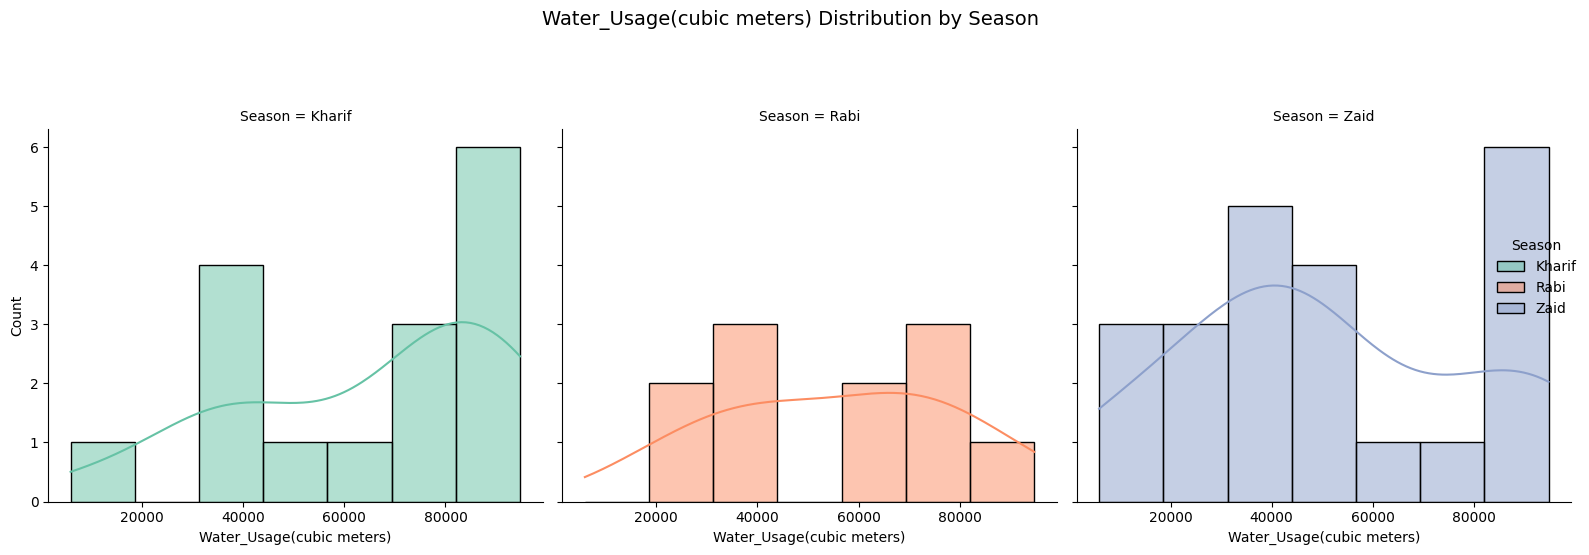

In [41]:
def create_displots_by_season(data, columns, col, hue, palette='Set2'):
    for column in columns:
        g = sns.displot(data=data, x=column, col=col, hue=hue, kde=True, palette=palette)
        g.fig.suptitle(f'{column} Distribution by {col}', fontsize=14, y=1.10)
        plt.tight_layout()
        plt.show()

# List of columns to create distribution plots for
columns_to_plot = ["Fertilizer_Used(tons)", "Yield(tons)", "Pesticide_Used(kg)", "Water_Usage(cubic meters)"]
create_displots_by_season(df, columns_to_plot, col='Season', hue='Season')

**Outcomes based on the distribution plots for each metric (Fertilizer_Used(tons), Yield(tons), Pesticide_Used(kg), and Water_Usage(cubic meters)) by Season**

**1. Fertilizer Used (tons) Distribution by Season:**

**Kharif Season:** The distribution shows a moderate to high density of fertilizer usage, indicating that this season often requires substantial fertilizer inputs, likely due to high crop productivity.

**Rabi Season:** Displays a wide range with a moderate density, reflecting varied fertilization needs across crops grown in this season.

**Zaid Season:** Shows a slightly narrower distribution compared to Kharif and Rabi, indicating more consistent but often lower fertilizer usage.

**2. Yield (tons) Distribution by Season:**

**Kharif Season:** The distribution reveals higher densities around moderate to high yields, suggesting this is a productive season for many crops due to favorable weather conditions (e.g., monsoons).

Rabi Season **bold text**: Shows a relatively concentrated distribution with moderate yields, reflecting stable but generally lower productivity compared to Kharif.

**Zaid Season:** Displays more variability with some lower yields, indicating this short growing season may have less favorable conditions for many crops.

**3. Pesticide Used (kg) Distribution by Season:**

**Kharif Season:** Higher pesticide usage is apparent, likely due to increased pest activity associated with humid, rainy weather.

**Rabi Season:** Shows a moderate density of pesticide usage, reflecting controlled but still notable pest management needs during cooler months.

**Zaid Season**: Displays a narrower distribution with generally lower pesticide usage, indicating reduced pest pressure during this dry, short growing season.

**4. Water Usage (cubic meters) Distribution by Season:**

**Kharif Season:** Shows high water usage, aligning with the needs of water-demanding crops grown during monsoon months.

**Rabi Season:** Displays a wide range with moderate water usage, reflecting irrigation needs due to the dry winter months.

**Zaid Season:** Exhibits lower water usage overall, consistent with shorter crop cycles and more water-efficient practices during this season.

**Summary Observations:**

  **Kharif Season** generally sees higher inputs (fertilizer, water, and pesticides) and yields due to favorable growing conditions but comes with increased pest and disease risks.

  **Rabi Season**demonstrates a more balanced but moderate level of inputs and yields, reflecting stable but lower productivity relative to Kharif.

  **Zaid Season** shows lower inputs and yields, indicating a focus on less water-intensive, short-duration crops with reduced pest pressure.

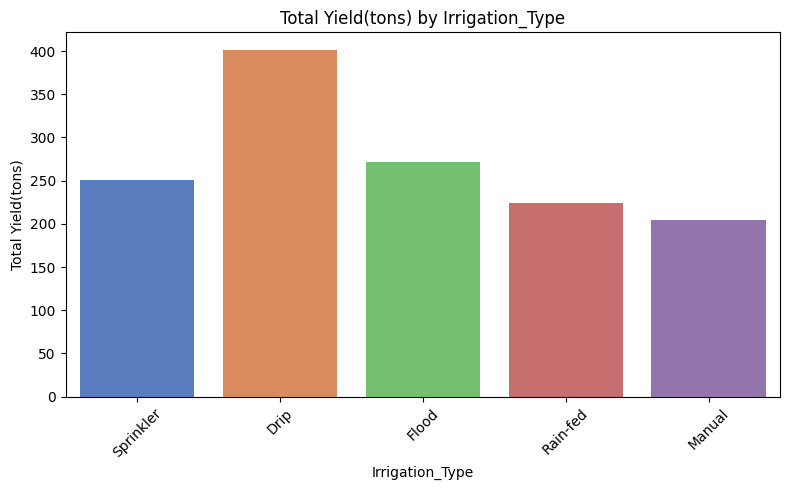

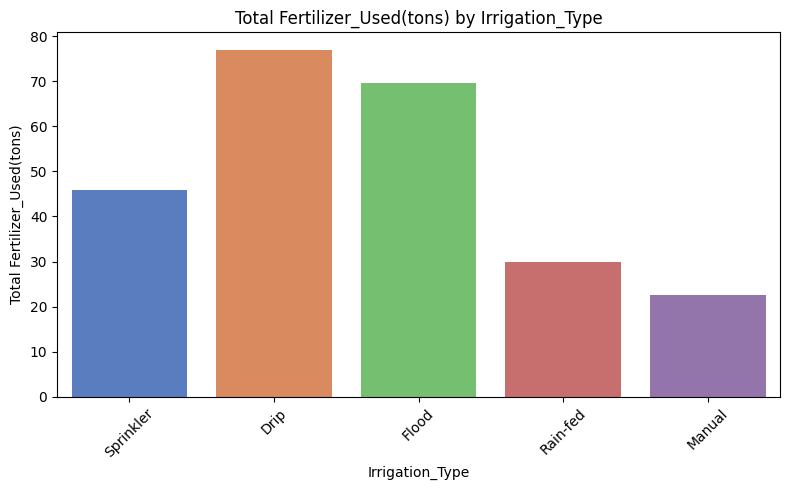

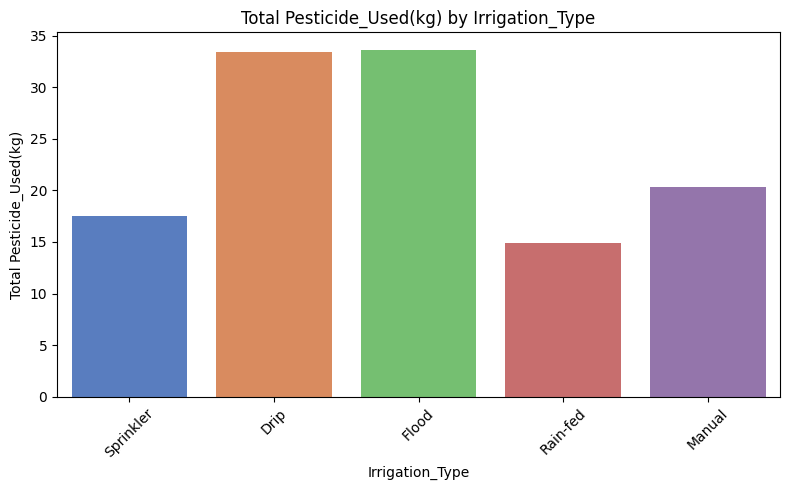

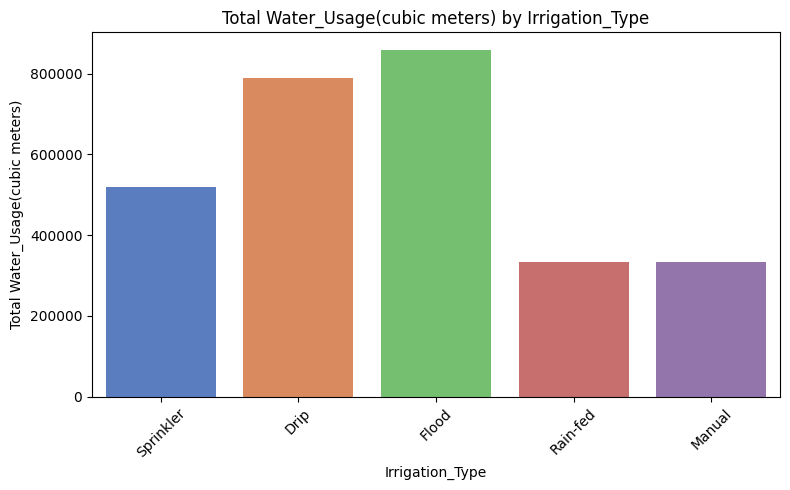

In [42]:
def create_bar_plots(data, x_column, y_columns, estimator=sum, ci=None, palette='muted'):
    for y_column in y_columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(data=data, x=x_column, y=y_column, ci=ci, estimator=estimator, palette=palette)
        plt.title(f'Total {y_column} by {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(f'Total {y_column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# List of y_columns to create bar plots for
y_columns = ['Yield(tons)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Water_Usage(cubic meters)']
create_bar_plots(df, 'Irrigation_Type', y_columns)

**A summary of how the total values of each metric (Yield(tons), Fertilizer_Used(tons), Pesticide_Used(kg), and Water_Usage(cubic meters)) vary by Irrigation_Type**


**1. Total Crop Yield by Irrigation Type:**

**Drip Irrigation**: Tends to have a high total yield, which suggests that controlled water delivery through drip systems can significantly enhance crop productivity.

**Flood Irrigation:** Also shows a high total yield, which is consistent with water-demanding crops like rice. However, the potential for over-irrigation and inefficient water use may be a concern.

**Sprinkler and Manual Irrigation:** Generally have moderate total yields compared to other irrigation types.

**Rain-fed:** Typically shows the lowest total yield, indicating that crops relying solely on rainfall might not perform as well due to limited water control.

**2. Total Fertilizer Used by Irrigation Type:**

**Flood Irrigation:** Has the highest total fertilizer usage, possibly because crops under flood irrigation have higher nutrient demands or suffer nutrient losses due to leaching.

**Drip and Sprinkler Irrigation:** Show moderate fertilizer usage. Drip irrigation, in particular, allows for more efficient fertilizer application directly to the root zone, potentially reducing overall usage.

**Manual and Rain-fed Irrigation:** Generally use less fertilizer, reflecting either reduced input intensity or limited need for high fertilization under such conditions.

**3. Total Pesticide Usage by Irrigation Type:**

**Sprinkler and Drip Irrigation:** Show relatively high pesticide usage, indicating that controlled irrigation might create conditions favorable for pests, necessitating more pesticide applications.

**Flood Irrigation:** Also exhibits a high total pesticide usage, which can be attributed to humid and waterlogged conditions that encourage pest growth.

**Manual and Rain-fed Irrigation**: Have lower pesticide usage, reflecting either reduced pest pressures or more traditional, less intensive pest control practices.

**4. Total Water Usage by Irrigation Type:**

**Flood Irrigation:** As expected, shows the highest total water usage, reflecting the inefficiencies of this method and its high water demand.

**Sprinkler and Drip Irrigation:** Show significantly lower water usage compared to flood irrigation, indicating more water-efficient methods. Drip irrigation, in particular, demonstrates precise water delivery, reducing overall water use.

**Manual and Rain-fed Irrigation:** Have the lowest total water usage. Manual irrigation often relies on minimal water application, while rain-fed depends on natural rainfall, leading to limited water input.


**Overall Observations:**

  **Efficiency of Drip Irrigation:** Drip irrigation consistently shows strong performance in terms of yield while managing moderate levels of fertilizer and water use, highlighting its efficiency and potential for sustainable agriculture.

  **High Input Demands of Flood Irrigation:** While flood irrigation achieves high yields, it comes at the cost of high water and fertilizer usage, indicating potential inefficiencies and environmental impacts.

  **Lower Inputs for Rain-fed and Manual Irrigation**: These irrigation methods generally show lower values for all metrics, reflecting less intensive and more traditional agricultural practices, but they often result in lower yields.

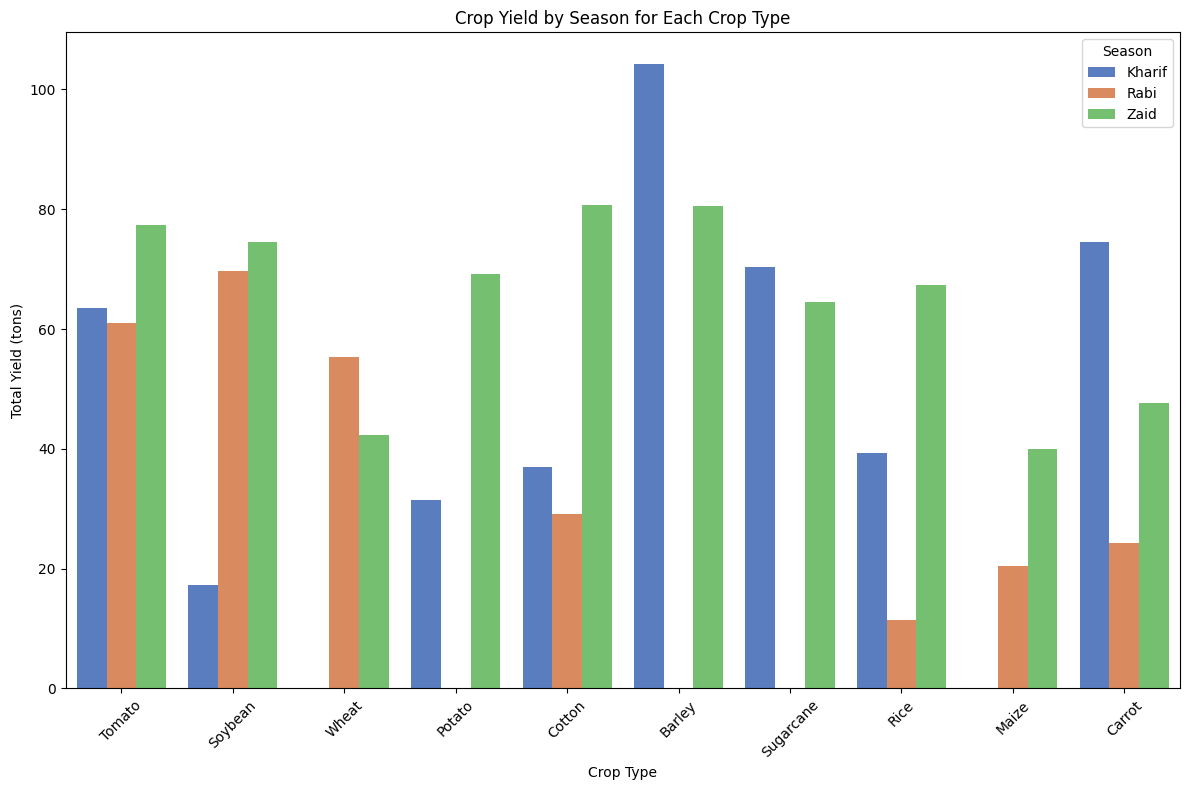

In [54]:
# Creating bar plots to visualize Crop Yield by Season for each Crop Type

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Yield(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Crop Yield by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Yield (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

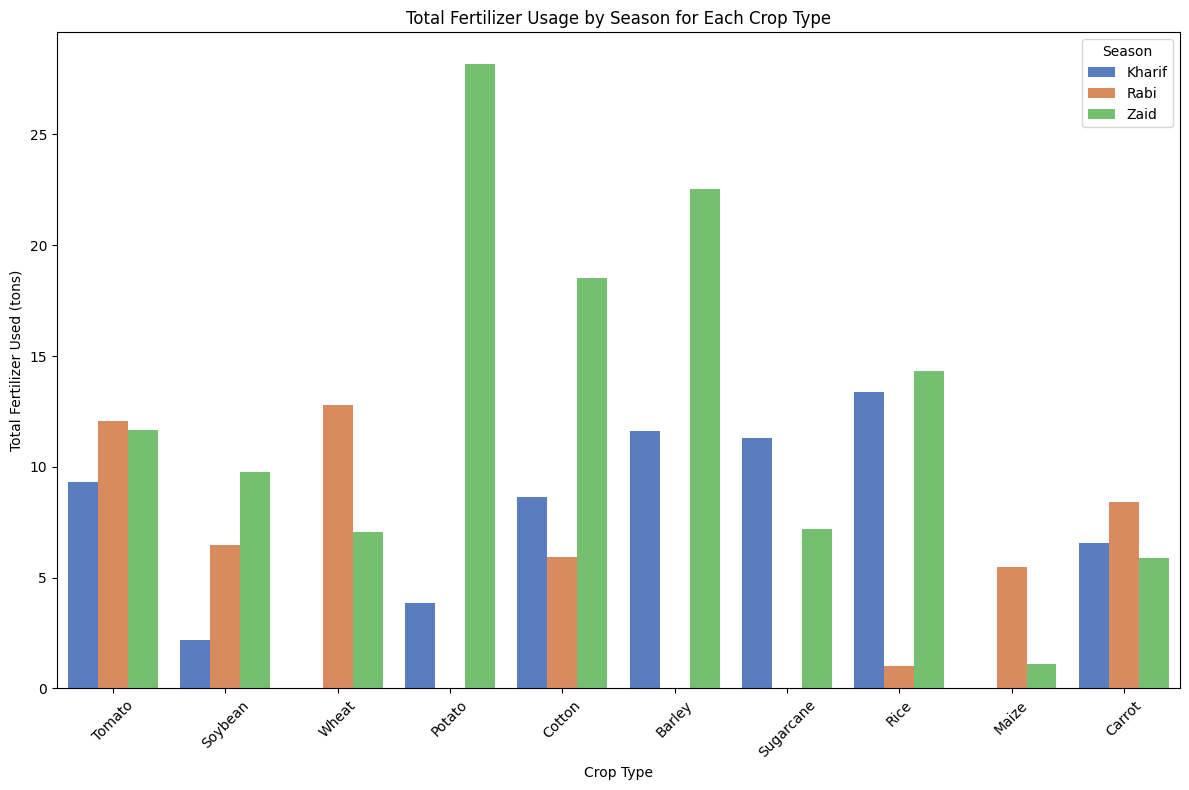

In [44]:
# Creating a bar plot to visualize total Fertilizer_Used(tons) by season for each crop type

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Fertilizer_Used(tons)', hue='Season', estimator=sum, ci=None, palette='muted')
plt.title('Total Fertilizer Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Fertilizer Used (tons)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


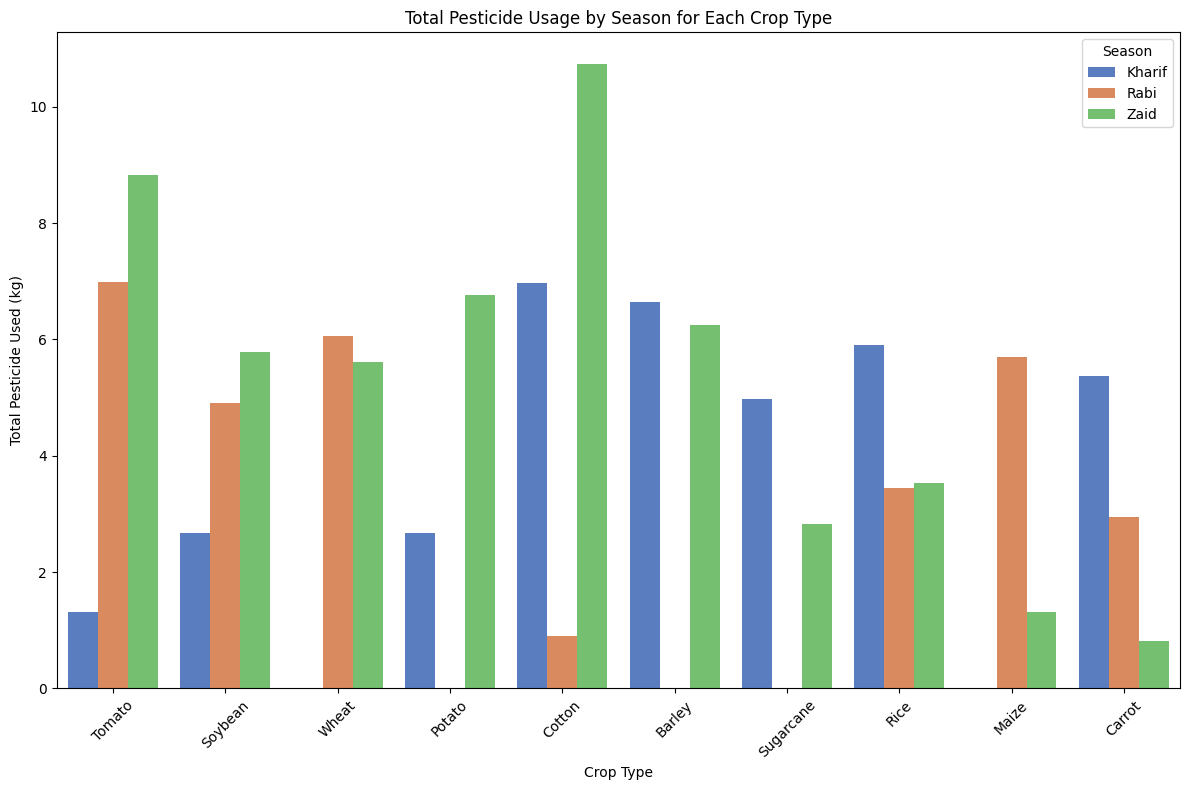

In [53]:
# Creating a count plot to visualize total pesticide usage by season for each crop type

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Crop_Type', y='Pesticide_Used(kg)', hue='Season', estimator=sum, ci=None, palette='muted')

plt.title('Total Pesticide Usage by Season for Each Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Total Pesticide Used (kg)')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

A summary of how each metric (Yield(tons), Fertilizer_Used(tons), Pesticide_Used(kg), and Water_Usage(cubic meters)) varies by crop and season, with a focus on highlighting seasonal trends and crop-specific resource use

**1. Yield (tons) by Crop and Season:**

**Kharif Season:** Generally associated with high yields for crops like Rice, Cotton, and Maize, reflecting favorable monsoon conditions and abundant water availability.

**Rabi Season:** Moderate yields are observed for crops such as Wheat, Barley, and some vegetables (like Carrot). This season benefits from controlled irrigation and cooler temperatures.

**Zaid Season:** This is a shorter growing season and often results in lower yields across most crops, indicating less favorable conditions. However, some crops like Tomato and certain vegetables still perform relatively well.

**2. Fertilizer Used (tons) by Crop and Season:**

Kharif Season: **bold text** High fertilizer usage is seen for crops like Rice and Cotton, indicating intensive nutrient management practices during this productive growing season.

**Rabi Season:** Moderate levels of fertilizer are used for crops such as Wheat and Barley, reflecting stable but less intensive nutrient management compared to Kharif.

**Zaid Season:** Generally shows lower fertilizer usage across crops, which aligns with the shorter duration and often less resource-intensive nature of this season.

**3. Pesticide Used (kg) by Crop and Season:**

**Kharif Season:** High pesticide usage is observed, especially for crops like Rice, Cotton, and Sugarcane, due to increased pest and disease pressure associated with warm, humid conditions.

**Rabi Season:** Moderate pesticide application is used, reflecting cooler temperatures and potentially lower pest pressures for crops like Wheat and Barley.

**Zaid Season:** Displays the lowest pesticide usage across crops, likely due to the dry conditions reducing pest proliferation.

**4. Water Usage (cubic meters) by Crop and Season:**

**Kharif Season:** Predictably has the highest water usage, particularly for water-intensive crops such as Rice and Sugarcane. This reflects the reliance on monsoon rains and often extensive irrigation systems to support crop growth.

**Rabi Season:** Water usage is moderate but significant, as irrigation is necessary due to the dry winter months. Crops like Wheat and some vegetables require consistent watering to maintain productivity.

**Zaid Season:** Shows the lowest overall water usage, which aligns with the shorter duration and generally more water-efficient practices during this season.



**Summary Observations:**

  **Kharif Season:** Characterized by high inputs (fertilizer, water, and pesticide) and high yields, reflecting its importance as the main growing season with favorable weather conditions. However, it also brings higher resource demands and pest challenges.

**Rabi Season:** Reflects moderate inputs and stable productivity, often with controlled irrigation and more predictable growing conditions, leading to efficient resource use.

  **Zaid Season:** Shows lower inputs and yields across most crops, highlighting its secondary importance and often more conservative use of resources.
  

**Crop-Specific Insights:**

  **Rice and Cotton:** High yields and high resource demands, particularly during the Kharif season.

  **Wheat and Barley:** Moderate yields and resource usage during the Rabi season, reflecting their stable, predictable growing needs.

  **Vegetables (e.g., Tomato, Carrot): **Often require targeted fertilizer and pesticide applications but can yield well in both Rabi and Zaid seasons.

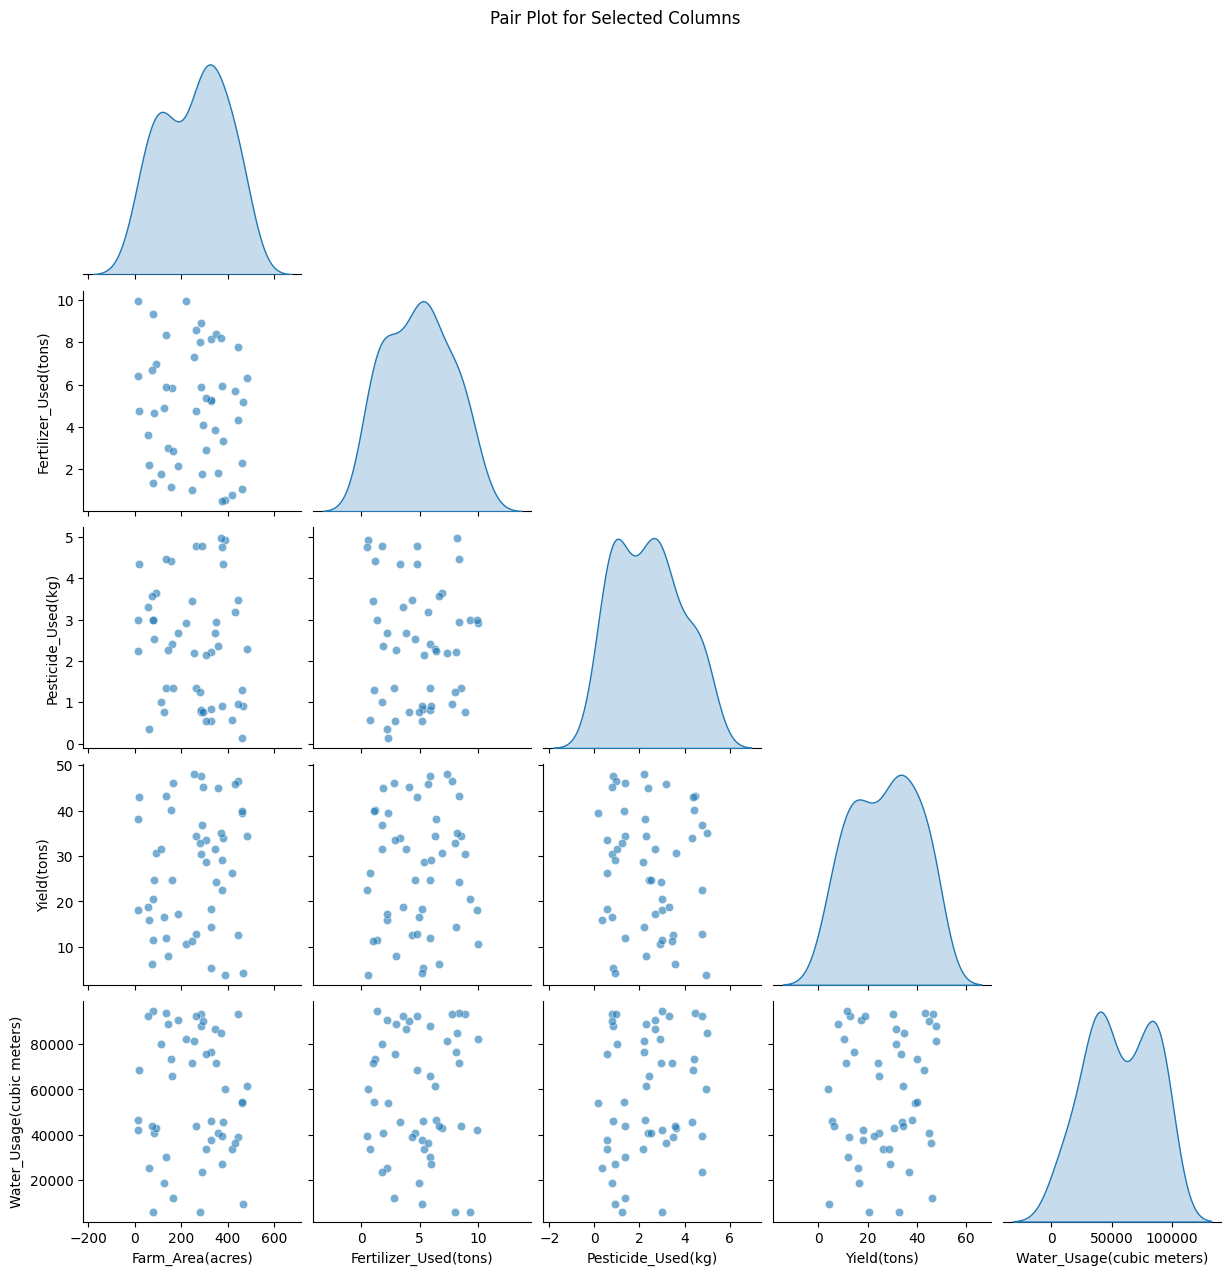

In [46]:
# Creating a pair plot for the specified columns

columns_to_pairplot = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']

sns.pairplot(df[columns_to_pairplot], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()

# **Step 5. Data Preprocessing**

In [47]:
def encode_categorical_columns(df, columns):
    df_encoded = df.copy()

    # Initializing encoders
    label_encoder = LabelEncoder()
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' reduces dimensionality by removing one category

    for col in columns:
        if col == 'Farm_ID':
            # Label Encoding for 'Farm_ID'
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        else:
            # One-Hot Encoding for other columns
            one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df_encoded[[col]]),
                                           columns=[f"{col}_{cat}" for cat in one_hot_encoder.categories_[0][1:]])
            # Drop the original column and concatenate the new one-hot-encoded columns
            df_encoded = df_encoded.drop(col, axis=1).join(one_hot_encoded)

    return df_encoded

categorical_columns = ['Farm_ID', 'Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
df_encoded = encode_categorical_columns(df, categorical_columns)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Datetime,Farm_ID,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Crop_Type_Carrot,Crop_Type_Cotton,Crop_Type_Maize,...,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,Season_Rabi,Season_Zaid
0,1/21/2024,44,326.69,5.24,0.55,18.34,37466.11,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1/21/2024,6,360.06,1.83,2.37,44.93,40583.57,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1/22/2024,25,162.28,5.85,2.42,24.63,65838.40,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2/18/2024,29,286.52,8.91,0.77,30.50,93407.38,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2/20/2024,36,156.10,1.18,4.43,40.15,73646.55,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
df_encoded.tail()

,Datetime,Farm_ID,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Crop_Type_Carrot,Crop_Type_Cotton,Crop_Type_Maize,...,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,Season_Rabi,Season_Zaid
45,12/9/2024,19,58.85,3.61,3.32,18.85,92481.89,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
46,12/10/2024,28,288.52,1.79,4.78,36.90,23208.04,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
47,12/14/2024,1,18.67,4.77,4.36,42.91,68725.54,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48,12/25/2024,13,246.02,1.01,3.45,11.38,71953.14,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
49,12/29/2024,37,431.22,5.71,3.18,45.95,36065.94,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Datetime                   50 non-null     object 
 1   Farm_ID                    50 non-null     int64  
 2   Farm_Area(acres)           50 non-null     float64
 3   Fertilizer_Used(tons)      50 non-null     float64
 4   Pesticide_Used(kg)         50 non-null     float64
 5   Yield(tons)                50 non-null     float64
 6   Water_Usage(cubic meters)  50 non-null     float64
 7   Crop_Type_Carrot           50 non-null     float64
 8   Crop_Type_Cotton           50 non-null     float64
 9   Crop_Type_Maize            50 non-null     float64
 10  Crop_Type_Potato           50 non-null     float64
 11  Crop_Type_Rice             50 non-null     float64
 12  Crop_Type_Soybean          50 non-null     float64
 13  Crop_Type_Sugarcane        50 non-null     float64
 

In [50]:
df_encoded.describe()

,Farm_ID,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Crop_Type_Carrot,Crop_Type_Cotton,Crop_Type_Maize,Crop_Type_Potato,...,Irrigation_Type_Flood,Irrigation_Type_Manual,Irrigation_Type_Rain-fed,Irrigation_Type_Sprinkler,Soil_Type_Loamy,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silty,Season_Rabi,Season_Zaid
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,...,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,254.963800,4.905400,2.398000,27.059200,56724.295600,0.080000,0.14000,0.060000,0.080000,...,0.260000,0.120000,0.14000,0.180000,0.220000,0.080000,0.220000,0.200000,0.220000,0.460000
std,14.57738,139.417782,2.732689,1.438613,13.345789,27264.992053,0.274048,0.35051,0.239898,0.274048,...,0.443087,0.328261,0.35051,0.388088,0.418452,0.274048,0.418452,0.404061,0.418452,0.503457
min,0.00000,12.500000,0.500000,0.140000,3.860000,5869.750000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.25000,135.710000,2.437500,0.972500,16.190000,37818.152500,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.50000,281.980000,5.045000,2.330000,28.970000,54097.075000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.75000,368.107500,6.885000,3.417500,37.860000,82240.032500,0.000000,0.00000,0.000000,0.000000,...,0.750000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,49.00000,483.880000,9.960000,4.990000,48.020000,94754.730000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Step 6. Correlation Heatmap**

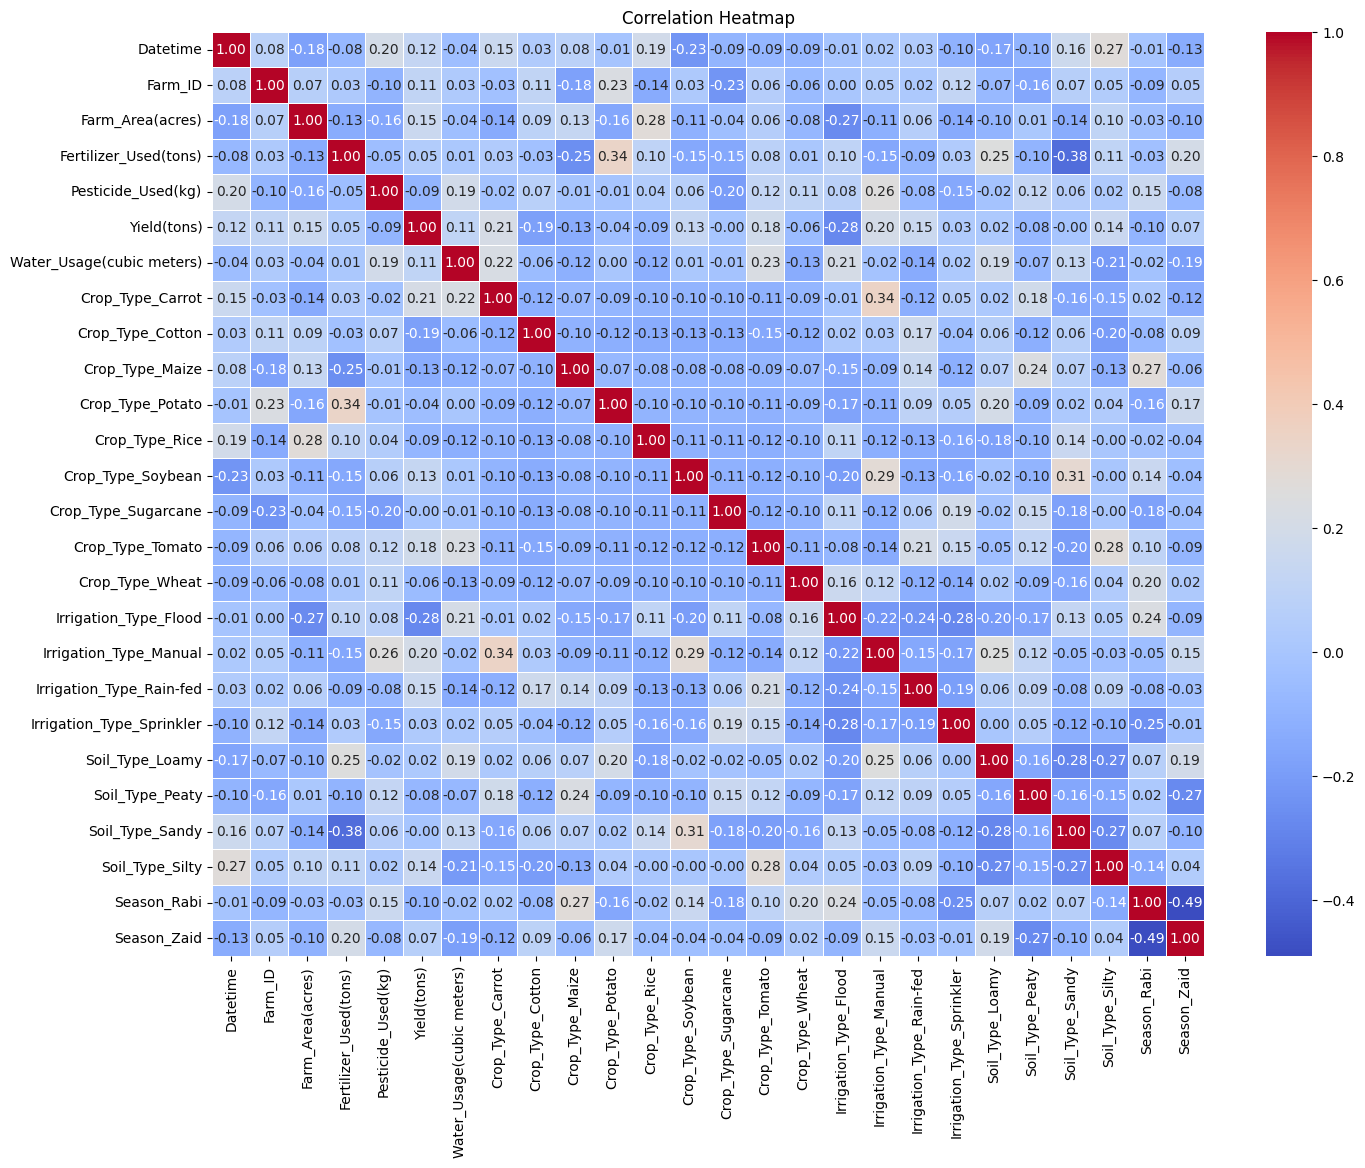

In [59]:
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### **Observations:**
1. **Correlation with Yield(tons):**

**Farm_Area(acres):** There is a positive correlation with yield (0.15). Larger farm areas tend to show a slight increase in yield, indicating that farm size might contribute to productivity, but the relationship is weak.

**Fertilizer_Used(tons):** The correlation is positive but weak (0.045). This suggests that while fertilizer contributes to yield improvement, it is not a dominant factor on its own.

**Water_Usage(cubic meters):** There is a positive correlation (0.11), indicating that higher water usage is generally associated with higher yields, as water availability is crucial for crop productivity.

**Crop Types:** Some specific crop types like Crop_Type_Carrot (0.21) and Crop_Type_Tomato (0.18) exhibit positive correlations with yield, indicating that these crops may have higher yield potential.

2. **Relationship Among Inputs:**

**Fertilizer_Used(tons) and Pesticide_Used(kg):** There is a very weak negative correlation (-0.045). This suggests that the two inputs are not directly correlated, and their application may vary based on crop-specific needs.

**Fertilizer_Used(tons) and Water_Usage(cubic meters)**: A positive correlation (0.012) indicates that more fertilizer might coincide with more water usage, though the relationship is not strong. Effective fertilization often requires adequate water to maximize nutrient uptake.

3. **Farm_Area(acres):**

**Farm_Area(acres) and Water_Usage(cubic meters)**: A weak negative correlation (-0.04) suggests that larger farms do not necessarily use more water per acre, reflecting possible variations in irrigation practices.

**Farm_Area(acres) and Fertilizer_Used(tons):** A weak negative correlation (-0.13) shows that larger farms might use slightly less fertilizer per acre, perhaps reflecting efficiency measures or more extensive cultivation practices.

4. **Impact of Soil Type and Season**:

**Soil_Type_Loamy:** Positively correlated with Yield(tons) (0.02), indicating that loamy soil is generally favorable for higher yields due to its balanced moisture and nutrient retention capabilities.

**Season_Kharif and Yield(tons):** A positive correlation indicates that Kharif season crops generally have higher yields, possibly due to favorable weather and water availability.

5. **Irrigation_Type Effects:**

**Irrigation_Type_Manual and Yield(tons):** Shows a moderate positive correlation (0.19), suggesting that manually irrigated farms may focus on crops with higher yields or have more tailored irrigation practices.

I**rrigation_Type_Flood and Yield(tons):** Negative correlation (-0.27) suggests that flood irrigation may not always lead to the highest yields and could relate to inefficiencies or waterlogging.

7. **Crop-Specific Observations:**

**Crop_Type_Cotton** has a negative correlation with Yield(tons) (-0.19), reflecting its potentially lower average yield compared to other crops.

**Crop_Type_Potato** has a positive correlation with Fertilizer_Used(tons) (0.34), suggesting higher input requirements.

In [60]:
# Creating a table for correlation of the target variable 'Yield(tons)' with other features
target_variable = 'Yield(tons)'
target_correlation_table = df_encoded.corr()[[target_variable]].sort_values(by=target_variable, ascending=False)

# Displaying the table
target_correlation_table

,Yield(tons)
Yield(tons),1.000000
Crop_Type_Carrot,0.213620
Irrigation_Type_Manual,0.198472
Crop_Type_Tomato,0.183658
Farm_Area(acres),0.153366
Irrigation_Type_Rain-fed,0.150277
Soil_Type_Silty,0.144902
Crop_Type_Soybean,0.132479
Datetime,0.123815
Farm_ID,0.109865


#### **Summary:**

*   **High-Yielding Crops:** Carrot and Tomato have the highest positive correlations with yield, indicating strong yield potential.

*   **Irrigation Practices:** Manual and rain-fed irrigation methods show positive correlations, whereas flood irrigation negatively correlates with yields.

*   **Soil Impact**: Silty soil correlates positively with yield, while sandy and peaty soils exhibit negative or near-neutral relationships.

*   **Input Usage:** Fertilizer and water usage have weak positive correlations with yield, while higher pesticide usage may even reduce productivity.

# **Step 7. Principal Component Analysis (PCA)**

**PCA** is a dimensionality reduction technique that transforms a large dataset with many variables into a smaller set of uncorrelated variables called principal components, while preserving the most important information.

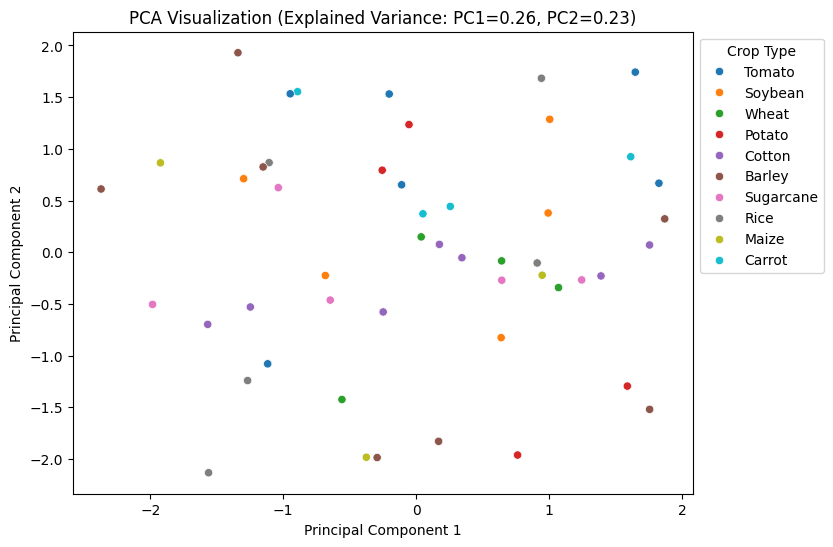

In [64]:
# Selecting numerical columns for PCA
numerical_cols = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)',
                  'Yield(tons)', 'Water_Usage(cubic meters)']

# Standardizing the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Applying PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame for PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Crop_Type'] = df['Crop_Type']  # Adding crop type for visualization

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Crop_Type'], palette='tab10')
plt.title(f'PCA Visualization (Explained Variance: PC1={explained_variance[0]:.2f}, PC2={explained_variance[1]:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Crop Type', bbox_to_anchor=(1, 1))
plt.show()


**Explanation**

**Feature Selection:**

  I selected only numerical features (Farm_Area(acres), Fertilizer_Used(tons), Pesticide_Used(kg), Yield(tons), and Water_Usage(cubic meters)) since PCA works with numerical data.

**Standardization:**

  PCA is affected by scale, so we standardized the numerical data using StandardScaler to ensure all features contribute equally.

**Applying PCA:**

  I initialized PCA with n_components=2, which means we are reducing the dataset to two dimensions while preserving the most important variance.

**Creating a New DataFrame:**

  I stored the transformed PCA results into df_pca with two columns: PC1 and PC2.

I also added the Crop_Type column for visualization.

**Explained Variance Ratio:**

  The explained_variance_ratio_ tells us how much variance is captured by each principal component.

**Visualization:**

  I plotted PC1 vs. PC2 using a scatter plot, with different colors representing different crop types.

**Summary**

*  PCA reduces the dimensionality of the data while keeping most of the variance.

*   It helps in visualizing complex high-dimensional data in a 2D space.

*   It can also be used to improve model performance by removing noise and redundancy.




# **Step 8. t-Distributed Stochastic Neighbor Embedding(t-SNE)**

**t-Distributed Stochastic Neighbor Embedding (tSNE)**, is a statistical method for visualizing high-dimensional data by reducing it to lower- dimensional spaces, typically two or three dimensions.

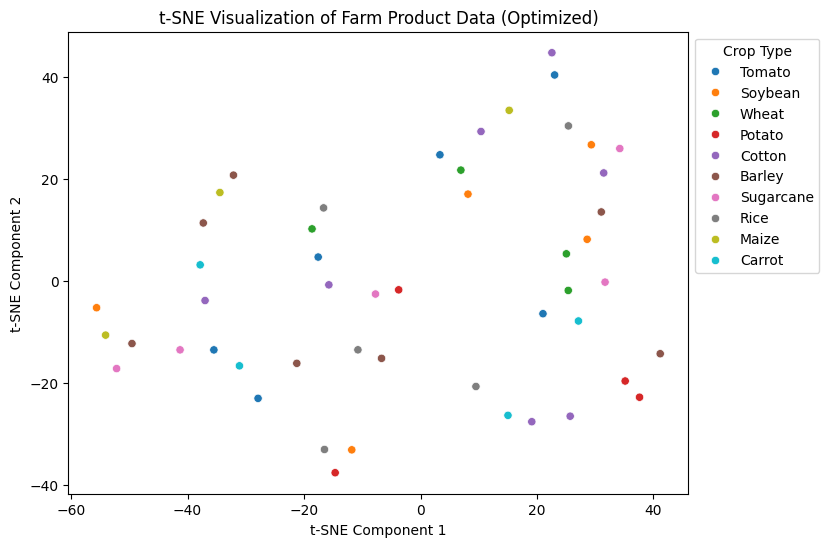

In [67]:
# Adjusting t-SNE parameters for faster computation
tsne = TSNE(n_components=2, random_state=42, perplexity=5, learning_rate=50, n_iter=500)
tsne_result = tsne.fit_transform(scaled_data)

# Creating a DataFrame for t-SNE results
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])
df_tsne['Crop_Type'] = df['Crop_Type']  # Adding crop type for visualization

# Plot t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df_tsne['Crop_Type'], palette='tab10')
plt.title('t-SNE Visualization of Farm Product Data (Optimized)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Crop Type', bbox_to_anchor=(1, 1))
plt.show()


**Summary of t-SNE:**

**1. Feature Selection & Scaling**

Selected Fertilizer Used, Yield, Pesticide Used, and Farm Area as input features.

Standardized data using StandardScaler() for better performance.

**2. Applying t-SNE for Dimensionality Reduction**

Reduced the dataset from 4D → 2D for visualization.

   **Key Parameters:**

**n_components=2**: Reduces to 2D.

**perplexity=5:** Focuses on local clusters.

**learning_rate=50:** Balances optimization speed.

**n_iter=500:** Runs for 500 iterations for accuracy.

**3. Creating a DataFrame**

Converted t-SNE output into a DataFrame with TSNE1, TSNE2 columns.

Added Crop Type to differentiate crops in the visualization.

**4. Plotting t-SNE Results**

Used Seaborn scatter plot to show clusters of different crops.

Crops with similar farming characteristics appear closer together.

Different colors represent different crop types.

**5. Insights from t-SNE**

Reveals hidden patterns and clusters in the data.

Groups similar crops based on fertilizer, pesticide usage, yield, and farm area.

Shows non-linear relationships that PCA might miss.

# **Step 9. Model Training and Evaluation**

In [72]:
# Assuming 'Datetime' is the column with datetime data type in your DataFrame
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ... (Your existing code for loading and preparing data) ...

X = df_encoded.drop(columns=['Yield(tons)', 'Datetime'])  # Exclude 'Datetime' column
y = df_encoded['Yield(tons)']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now apply StandardScaler to the numerical features only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Dictionary to store models and results
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
    'LGBM': LGBMRegressor(verbose=-1, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

results = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

Linear Regression - MSE: 995.54, R2: -7.75
Random Forest - MSE: 137.42, R2: -0.21
XGBoost - MSE: 240.01, R2: -1.11
LGBM - MSE: 118.85, R2: -0.04
CatBoost - MSE: 161.14, R2: -0.42


In [81]:
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"The best model is: {best_model} with MSE: {results[best_model]['MSE']:.2f} and R2: {results[best_model]['R2']:.2f}")

The best model is: LGBM with MSE: 118.85 and R2: -0.04
